<center>
  <h1>Victorian Era Novelists Authorship Attribution</h1>
  <h2>Progetto di Machine Learning</h2>
  <br>
  <h4>Autori:</h4>
  <p>
    <strong>Elisa Venditti</strong> (Ing. Informatica - matricola 0315909)<br>
    <strong>Francesca Venditti</strong> (Ing. Gestionale - matricola 0309669)<br>
  </p>
  <br>
  <h4>Professore:</h4>
  <p>
    <strong>Giorgio Gambosi</strong>
  </p>
  <br>
  <h5>Anno Accademico 2022/2023</h5>
</center>



Il progetto si concentra sullo sviluppo di vari modelli di machine learning atti a risolvere il problema dell'attribuzione dell'authorship. Il dataset si compone di testi dell'era vittoriana. Trattandosi di dati testuali si rende necessario un preprocessamento del testo al fine di rendelo adatto alla classificazione.

Saranno sviluppati diversi modelli e ne saranno analizzate le prestazioni in modo critico, effettuando infine un confronto sulla bontà delle varie soluzioni.

# INDICE
* [Preprocessing](#Analisi-del-dataset)
  * [Analisi del dataset](#Analisi-del-dataset)
  * [Riduzione del dataset e campionamento di training set e test set](#Riduzione)
  * [Preprocessamento dei dati](#preprocessing)
  * [Riduzione di dimensionalità](#dim)
* [Modelli](#model)
  * [Random Forest](#model)
  * [Support Vector Machine](#svm)
  * [Softmax Regression](#soft)
  * [Multilayer Perceptron](#mlp)
  * [Confronto tra modelli](#conf)
* [Analisi delle classi](#Analisi-delle-classi)
* [Sentiment Analysis](#sentiment)
* [Word Embedding](#embedding)
* [Bilanciamento del dataset](#bila)
* [Conclusioni](#conc)


<h1> PREPROCESSING </h1>
<h2> ANALISI DEL DATASET <a name="Analisi-del-dataset"></a></h2>

Il punto di partenza del presente progetto è rappresentato dallo studio: "Gungor, A. (2018). Fifty Victorian Era Novelists Authorship Attribution Data. IUPUI University Library (http://dx.doi.org/10.7912/D2N65J)." A tale studio si deve la creazione del dataset utilizzato nel seguito. Gli autori si sono occupati dell'estrazione di testi di 1000 parole da una serie di libri risalenti all'epoca vittoriana. Partendo da tali estratti, si intende approfondire il problema dell'**authorship attribution** facendo uso di modelli studiati durante il corso di Machine Learning assieme alle principali tecniche di analisi del testo.


I dati forniti dallo studio considerato sono in formato CSV, dunque, come prima cosa, è necessario estrarli. Dall'istogramma del dataset si può notare che alcuni autori non hanno nessun item associato. Tale caratteristica dei dati è stata introdotta ad hoc dagli autori del dataset per rendere il problema non esaustivo, reinserendo le classi mancanti in un secondo dataset utilizzato per il test. Tuttavia, nel presente progetto si è fatto uso solamente del primo dataset, in quanto il secondo era privo di etichette. Dunque, nel seguito si considerano assenti le 5 classi in questione.


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset di training:



text  author
0      ou have time to listen i will give you the ent...       1
1      wish for solitude he was twenty years of age a...       1
2      and the skirt blew in perfect freedom about th...       1
3      of san and the rows of shops opposite impresse...       1
4      an hour s walk was as tiresome as three in a s...       1
...                                                  ...     ...
53673  after surrounding and searching the whole plac...      50
53674  giant who could make a young earthquake or a w...      50
53675  waters of the lake at the bottom of the hill c...      50
53676  fingers and thumb in it exactly as it came out...      50
53677  giant s sake he won t meet with for if he does...      50

[53678 rows x 2 columns]

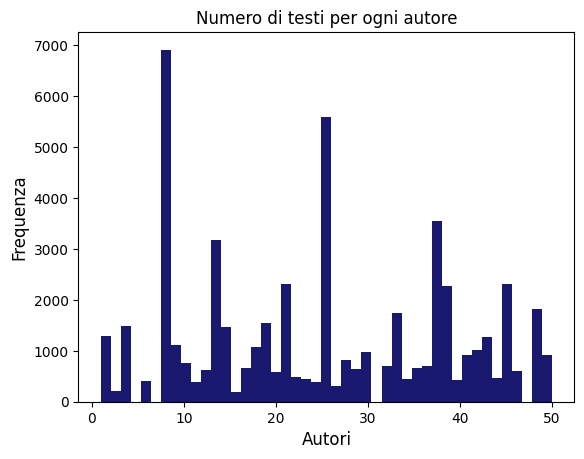

In [ ]:
import numpy as np
import pandas as pd
from sklearn import svm
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay
from google.colab import drive
drive.mount('/content/drive')

import warnings
warnings.filterwarnings('ignore')


file = "/content/drive/MyDrive/Gungor_2018_VictorianAuthorAttribution_data-train.csv"
# file = "C:\\Users\\Utente\\Desktop\\ML\\materiale\\Gungor_2018_VictorianAuthorAttribution_data-train.csv"
df   = pd.read_csv(file, delimiter=',',  encoding='latin-1')
print("Dataset di training:\n")
display(df)


classes = [x for x in df['author'].unique()]
authors = len(classes)


# Istogramma
authors_array = df['author'].to_numpy()
plt.hist(authors_array, bins=authors, color='midnightblue')
plt.xlabel('Autori', fontsize=12)
plt.ylabel('Frequenza',fontsize=12)
plt.title('Numero di testi per ogni autore')
plt.show()

## RIDUZIONE DEL DATASET E CAMPIONAMENTO DI TRAINING SET E TEST SET <a name="Riduzione"></a>
La riduzione di istanze del dataset è necessaria a causa di problemi computazionali. Uno tra i modelli utilizzati, ad esempio, è la SVM che ha una complessità di $O(n^3)$. In questo caso, mantenere il dataset con oltre 50.000 istanze comporterebbe un aumento nel tempo di esecuzione che renderebbe infattibile in tempi accettabili il miglioramento della funzione obiettivo.

Viene sfruttata la funzione _train_test_split_ per entrambi i compiti da svolgere:
* per prima cosa si riduce la dimensionalità dell'intero dataset ($10\%$ dell'originale), campionando autore per autore in modo da lasciare inalterata la proporzione di elementi nelle classi;
* si estrae, poi, training set e test set con le proporzioni $70-30$.


text  author
49633  if there too danger threatened they should on ...      45
41139  court for mark you here mr david we could no d...      38
40347  sleeve for to at they have that or which it is...      37
34213  ts â i js d each cloth covers for binding is e...      32
49436  rise into the air with colours waving with the...      45
...                                                  ...     ...
15685  i had not seen him for many weeks before he sa...      14
40134  present but with eye the past or heedless of t...      37
14694  the mother who provided the tea and other it w...      14
43605  every single officer the warrant and petty off...      39
24753  as old as the race itself and yet new to every...      23

[3773 rows x 2 columns]

text  author
34197  country a wet summer is a very nasty business ...      32
36246  uncle s daughter â that is what has changed he...      33
24958  the achievements of our countrymen and inciden...      23
19163  not to one or of tbe forms just as you or i gr...      18
16759  her carriage and was driving to that her consc...      15
...                                                  ...     ...
51178  d and u have in china than a iti europe variet...      48
9831   mr for a little m i indulgence the name i have...       8
30329  of expressing himself which made them all wort...      26
34354  looking upon that mother now taking of her sur...      32
23482  of here i reckon the glass has fallen some mor...      21

[1617 rows x 2 columns]

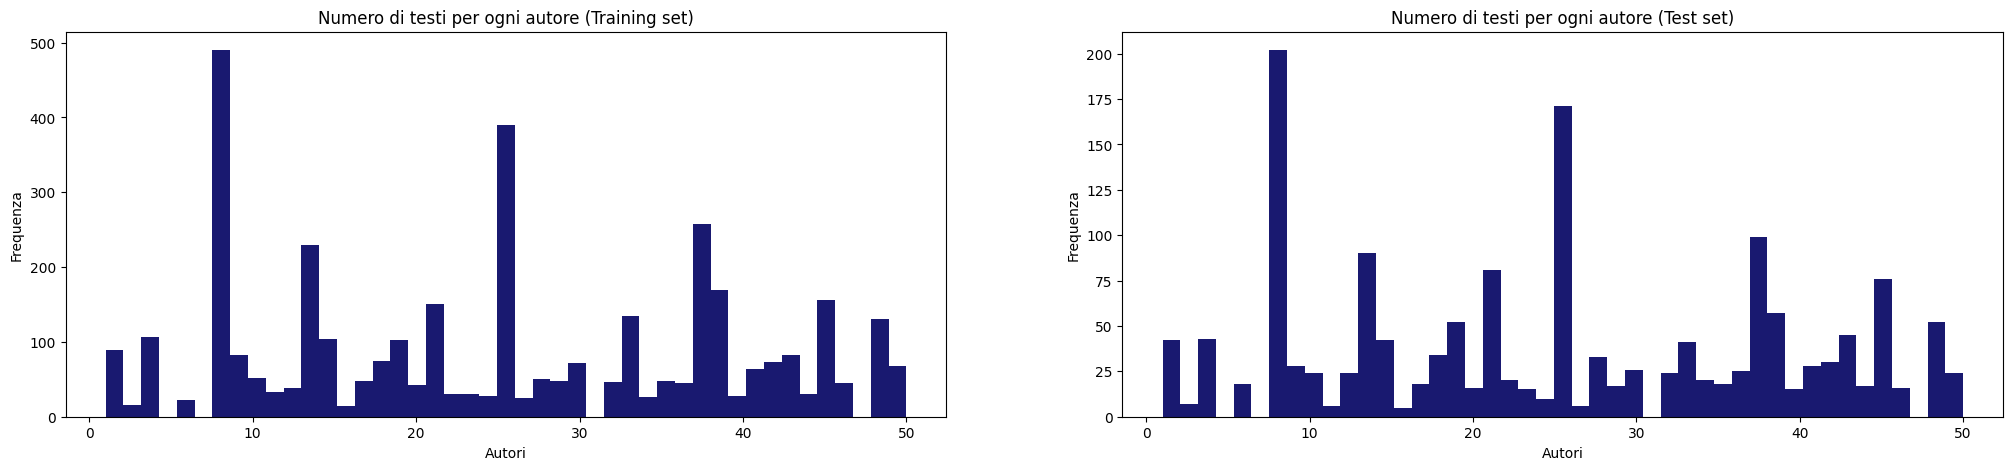

In [ ]:
from sklearn.model_selection import train_test_split


small_df     = pd.DataFrame()
percentage   = 0.1
percentage_t = 0.3


# RIDUZIONE DATASET: small_df
for author in classes:
    df_author = df.loc[df.author == author]
    _, small  = train_test_split(df_author, test_size=percentage, random_state=42)
    small_df  = pd.concat([small_df, small])


# ESTRAZIONE DI TRAINING SET E TEST SET
df, dft = train_test_split(small_df, test_size=percentage_t, random_state=20, stratify=None)
display(df)
display(dft)


# ISTOGRAMMI
fig, axes = plt.subplots(1, 2, figsize=(25,5))
axes[0].hist(df.author.to_numpy(), bins=authors, color='midnightblue')
axes[0].set(xlabel='Autori', ylabel='Frequenza', title='Numero di testi per ogni autore (Training set)')

axes[1].hist(dft.author.to_numpy(), bins=authors, color='midnightblue')
axes[1].set(xlabel='Autori', ylabel='Frequenza', title='Numero di testi per ogni autore (Test set)')

plt.show()


# TRASFORMAZIONE DEL DATA FRAME IN ARRAY
global_corpus = df.text.to_numpy()
test_corpus   = dft.text.to_numpy()



## PREPROCESSAMENTO DEI DATI <a name="preprocessing"></a>
I testi devono essere trasformati in una _rappresentazione vettoriale_ al fine di essere trattati.

Per prima cosa, i corpus vengono *lemmatizzati* per ridurre le parole alla loro forma canonica e considerarle, così, equivalenti (e.g. week e weeks). Successivamente viene creata la rappresentazione vettoriale per ogni testo del dataset che, in questo modo, viene descritto da un vettore numerico con le occorrenze dei termini.

La rappresentazione scelta utilizza i pesi _tfidf_, un modello "bag of words" che, dunque, perde l'informazione sintattica e semantica delle parole.

Nella costruzione della nuova rappresentazione, vengono specificati alcuni parametri:
* ```stop_words='english'``` serve per eliminare le parole poco informative o insignificanti per l'analisi del testo (e.g. and, or, the);
* ```max_df=0.9``` serve per eliminare le parole molto frequenti in tutti i testi, che quindi non aiutano con la classificazione;
* ```min_df=2``` serve per eliminare gli *hapax*, ovvero parole che occorrono una sola volta e quindi troppo deboli per aiutare con la classificazione.

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer


# Funzione per la lemmatizzazione di un testo in formato stringa
def lemmatize_text(text, lemmatizer):
    tokens            = text.split()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized_tokens)



# Creazione della distribuzione delle parole per i vari autori
lemmatizer = WordNetLemmatizer()
vectorizer = TfidfVectorizer(encoding='latin-1', stop_words='english', lowercase=True, max_df=0.9, min_df=2)


lemmatized_data      = [lemmatize_text(text, lemmatizer) for text in global_corpus]
lemmatized_data_test = [lemmatize_text(text, lemmatizer) for text in test_corpus]


X_train = vectorizer.fit_transform(lemmatized_data)
y_train = df.author
X_test  = vectorizer.transform(lemmatized_data_test)
y_test  = dft.author


print(X_train.shape)
print("\nPesi tfidf per il primo documento:\n {}".format(X_train[0]))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


(3773, 8427)

Pesi tfidf per il primo documento:
   (0, 5523)	0.03243329276376943
  (0, 4713)	0.038815270660746005
  (0, 8036)	0.04510607923490048
  (0, 5167)	0.08724034818203943
  (0, 4296)	0.03312966785850974
  (0, 426)	0.04565005230683337
  (0, 1487)	0.048761731104218574
  (0, 6818)	0.049640941521326275
  (0, 6297)	0.05568906804870958
  (0, 7000)	0.046134613556416675
  (0, 1321)	0.033207594320744944
  (0, 4817)	0.06229363945977506
  (0, 7751)	0.03172936523883529
  (0, 5792)	0.052757426342464844
  (0, 2039)	0.04742894856791042
  (0, 567)	0.0637477190041989
  (0, 6782)	0.04495464021607622
  (0, 7311)	0.04812637725959305
  (0, 7790)	0.047983949441840264
  (0, 5057)	0.049376292271138926
  (0, 3139)	0.04469368226556933
  (0, 2452)	0.06704070047062846
  (0, 2606)	0.05395714407096597
  (0, 505)	0.04390520776612947
  (0, 1833)	0.04827033933828946
  :	:
  (0, 4394)	0.07370121402305461
  (0, 7141)	0.13833299357443726
  (0, 7164)	0.059903034981822
  (0, 4427)	0.06717619949974621
  (0, 4799)	0.

I dati testuali soffrono spesso di un grande problema: la rappresentazione vettoriale risulta troppo sparsa nello spazio delle features. Questa caratteristica rende problematica l'applicazione degli algoritmi e l'interpretazione dei risultati.

Per una visualizzazione grafica, si ricorre a una *heatmap* della matrice $termini \times documenti$.

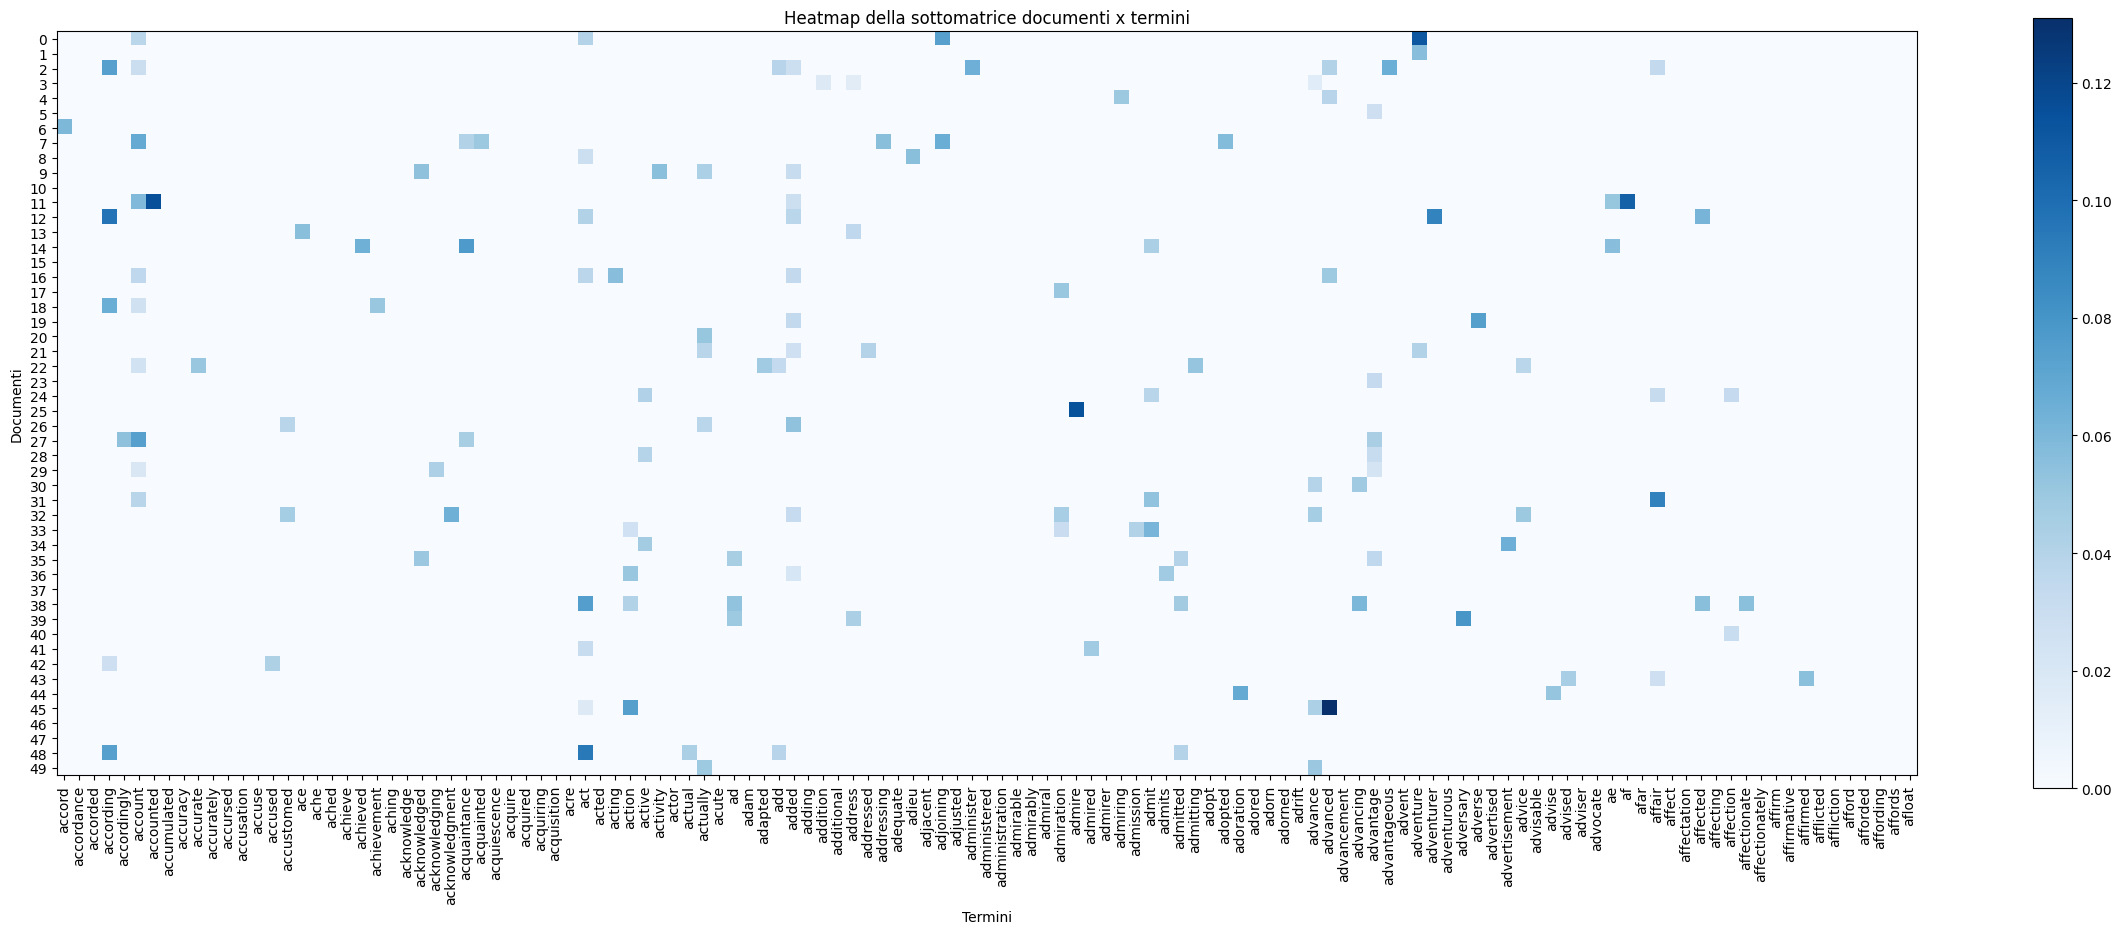

In [ ]:
num_words = 125
num_docs = 50
start = 60


# Nomi delle feature corrispondenti alle colonne della matrice
feature_names = vectorizer.get_feature_names_out()

# Sottomatrice documenti x termini
sub_matrix = X_train[:num_docs, start:start+num_words].toarray()


plt.figure(figsize=(30, 10))
plt.imshow(sub_matrix, cmap=plt.cm.Blues, interpolation='nearest')
plt.colorbar()
plt.xlabel('Termini')
plt.ylabel('Documenti')
plt.title('Heatmap della sottomatrice documenti x termini')
plt.xticks(range(num_words), feature_names[start:start+num_words], rotation='vertical')
plt.yticks(range(num_docs))
plt.show()



***Commenti***:

* La heatmap rende immediata la visualizzazione di una matrice notevolmente sparsa;
* La lemmatizzazione non ha funzionato a dovere, in quanto riesce a convertire correttamente solo il plurale dei lemmi e non, ad esempio, la coniugazione dei tempi verbali (e.g. _acted_ e _acting_ non vengono convertiti in _act_).

# RIDUZIONE DI DIMENSIONALITÀ <a name="dim"></a>
Al fine di contenere il problema della dimensionalità, occorre ridurre il numero di features. Tuttavia, non è possibile utilizzare la classica PCA a causa di una matrice $termini \times documenti$ eccessivamente sparsa. Per i dati testuali esiste una tecnica chiamata LSA (Latent Semantic Analysis): in particolare, sarà utilizzata la Truncated SVD (Singular Value Decomposition) che fornisce la miglior approssimazione della matrice $termini\times documenti$ in $k<n$ dimensioni.

Come prima cosa, si procederà con una decomposizione ai valori singolari della matrice originaria. Infatti, si vuole conoscere la varianza spiegata delle varie componenti (direttamente ottenibile dai valori singolari) per poi scegliere un buon compromesso per k. Una volta selezionato un valore per k, si procederà con una Truncated SVD giungendo alla forma approssimata per la matrice $termini \times documenti$.

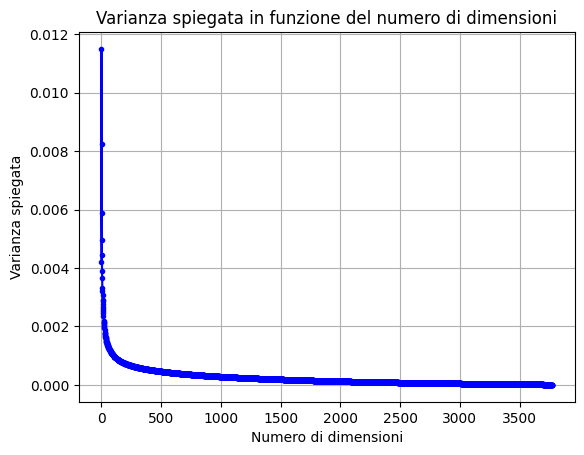

In [ ]:
num_pc = X_train.shape[1]-1
svd = TruncatedSVD(n_components=num_pc, random_state=42)
svd.fit(X_train)


# Calcolo della varianza spiegata
singular_values = svd.singular_values_
variance_explained = svd.explained_variance_


plt.plot(np.arange(1, len(singular_values) + 1), variance_explained, 'b.-')
plt.xlabel('Numero di dimensioni')
plt.ylabel('Varianza spiegata')
plt.title('Varianza spiegata in funzione del numero di dimensioni')
plt.grid(True)
plt.show()

***Commenti***:

Si nota che l'andamento della varianza spiegata mostra un 'gomito' tra $0$ e $500$ features. Studiando gli effetti delle varie scelte sui modelli, è stato osservato come le prestazioni variassero di poco tra $200$ e $500$ feature. Dunque si sceglie di proseguire con $k = 300$ (dove k è la dimensionalità ridotta) in quanto risulta un buon compromesso nell'intervallo: le performance sono nettamente più vicine a quelle ottenute con $k=500$, pur "risparmiando" duecento features rispetto a questo ultimo caso. Certamente si sta tagliando fuori parte dell'informazione, tuttavia è una procedura necessaria per trattare dati sparsi.

In [ ]:
# Decomposizione SVD con k=300 dimensioni
k = 300
svd_def = TruncatedSVD(n_components=k, n_iter=7, random_state=42)
svd_def.fit(X_train)

X_transformed = svd_def.transform(X_train)

print("X_transformed shape: {}\n".format(X_transformed.shape))
print("y_train shape      : {}\n".format(y_train.shape))

X_transformed shape: (3773, 300)

y_train shape      : (3773,)



In [ ]:
X_train = X_transformed
X_test = svd_def.transform(X_test)
print(type(X_train))

<class 'numpy.ndarray'>


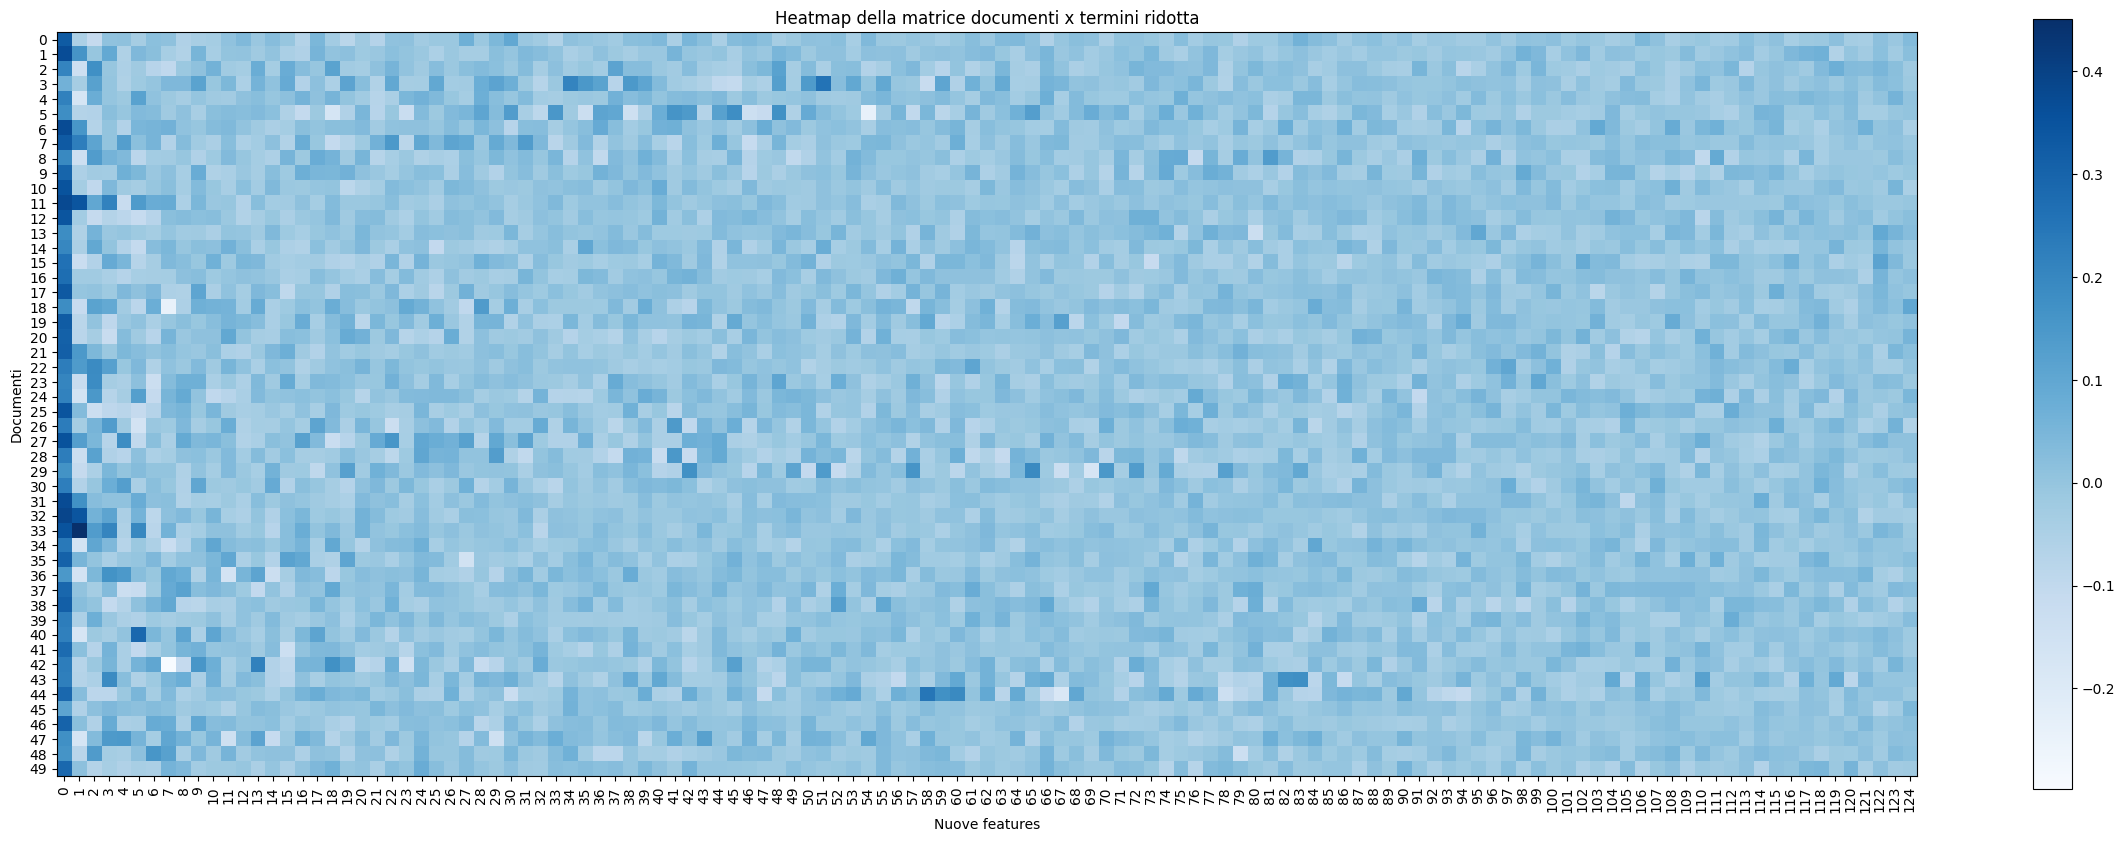

In [ ]:
# Stampare una sottomatrice della matrice termini x documenti
num_words = 125
num_docs = 50
start = 0

sub_matrix = X_train[:num_docs, start:start+num_words]#.toarray()

plt.figure(figsize=(30, 10))
plt.imshow(sub_matrix, cmap=plt.cm.Blues, interpolation='nearest')
plt.colorbar()
plt.xlabel('Nuove features')
plt.ylabel('Documenti')
plt.title('Heatmap della matrice documenti x termini ridotta')
plt.xticks(range(num_words), range(start,start+num_words), rotation='vertical')
plt.yticks(range(num_docs))
plt.show()

***Commenti***:

Attraverso la procedura di riduzione dimensionale, è stata ottenuta una matrice decisamente più densa. Guardando alla heatmap come a un'immagine, nella parte sinistra si può apprezzare maggiormente la differenza tra i "pixel", che invece risultano più omogenei nella parte destra. Questo si spiega grazie alla maggior varianza racchiusa nelle prime componenti.


In [ ]:
# utility function - stampa la barra per il progresso
# i = iterazione corrente
# iterations = numero massimo di iterazioni

def print_progress(i, iterations):
    progress = i/iterations * 100
    bar = '[' + '=' * int(progress / 10) + '>' + '.' * (10 - int(progress / 10)) + ']'
    print(f'Cross validation in corso: {progress:.1f}% {bar}', end='\r')

# MODELLI
## RANDOM FOREST <a name="model"></a>

Il random forest è un _ensemble di modelli_, ciascuno dei quali è un _albero di decisione_.

Gli alberi di decisione sono classificatori che partizionano ricorsivamente lo spazio, generando regioni dai confini regolari: ogni nodo dell'albero rappresenta una certa regione che i nodi successori vanno a bipartire attraverso la scelta di una certa feature e di una specifica soglia.

L'ensemble di modelli di tipo "bagging" prevede la costruzione di predittori indipendenti, le cui predizioni vengono poi combinate attraverso una moda. Il random forest costruisce i vari alberi facendo uso di diversi _bootstrap sample_. Inoltre, ogni albero sfrutta la randomicità per selezionare $m$ features entro le quali scegliere la migliore.

A causa della loro struttura, gli alberi di decisione sono soggetti facilmente a ricadere nell'_overfitting_, dunque occorre contenere questo fenomeno **limitando la profondità dell'albero**. Si tratta di una tecnica di regolarizzazione. Per apprendere il miglior iperparametro (_max_depth_) si procederà con una cross validation.

La cross validation divide il dataset in $k$ insiemi (fold) e, nelle varie iterazioni, vengono partizionati nel seguente modo: $k-1$ fold per il training set e $1$ fold per il validation set. Ciascuna iterazione produce un risultato di performance. La media delle prestazioni sulle singole iterazioni può essere considerata come una buona stima delle prestazioni del modello allenato su tutto il training set.


Le prestazioni per ciascuna iterazione della cross validation vengono calcolate attraverso la _f-measure_, che computa la media armonica tra la precision e la recall. Questa metrica rappresenta il giusto compromesso per valutare la bontà della classificazione. La _f-measure_ è una misura propria della classe, dunque per arrivare ad una misura globale si sfrutterà la _micro average_.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

n_estimators = 100         # numero di alberi nella foresta
criterion    = 'entropy'


max_depth_values = np.arange(4,18,2)
i = 1
iterations = len(max_depth_values)
mean_scores = []

for m in max_depth_values:

    print_progress(i, iterations)

    rf_model = RandomForestClassifier(n_estimators=n_estimators, criterion=criterion, max_depth=m, random_state=2)
    scores = cross_val_score(rf_model, X_train, y_train, cv=10, scoring='f1_micro')
    mean_scores.append(np.mean(scores))
    i += 1

print("Score medio:", mean_scores)
plt.scatter(max_depth_values, mean_scores)
plt.xlabel('Valori di max_depth')
plt.ylabel('Score medio')
plt.title('F1-Score medio nelle iterazioni della Cross-Validation')
plt.show()

print("Il miglior valore di max_depth tra quelli analizzati è {}".format(max_depth_values[np.argmax(mean_scores)]))

Report classificazione training set:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        61
           2       1.00      1.00      1.00        28
           3       1.00      1.00      1.00        15
           4       1.00      1.00      1.00       106
           6       1.00      1.00      1.00        23
           8       1.00      1.00      1.00       490
           9       1.00      1.00      1.00        83
          10       1.00      1.00      1.00        52
          11       1.00      1.00      1.00        33
          12       1.00      1.00      1.00        39
          13       1.00      1.00      1.00        30
          14       1.00      1.00      1.00       199
          15       1.00      1.00      1.00       104
          16       1.00      1.00      1.00        14
          17       1.00      1.00      1.00        48
          18       1.00      1.00      1.00        74
          19       1.00      1.00      1.00

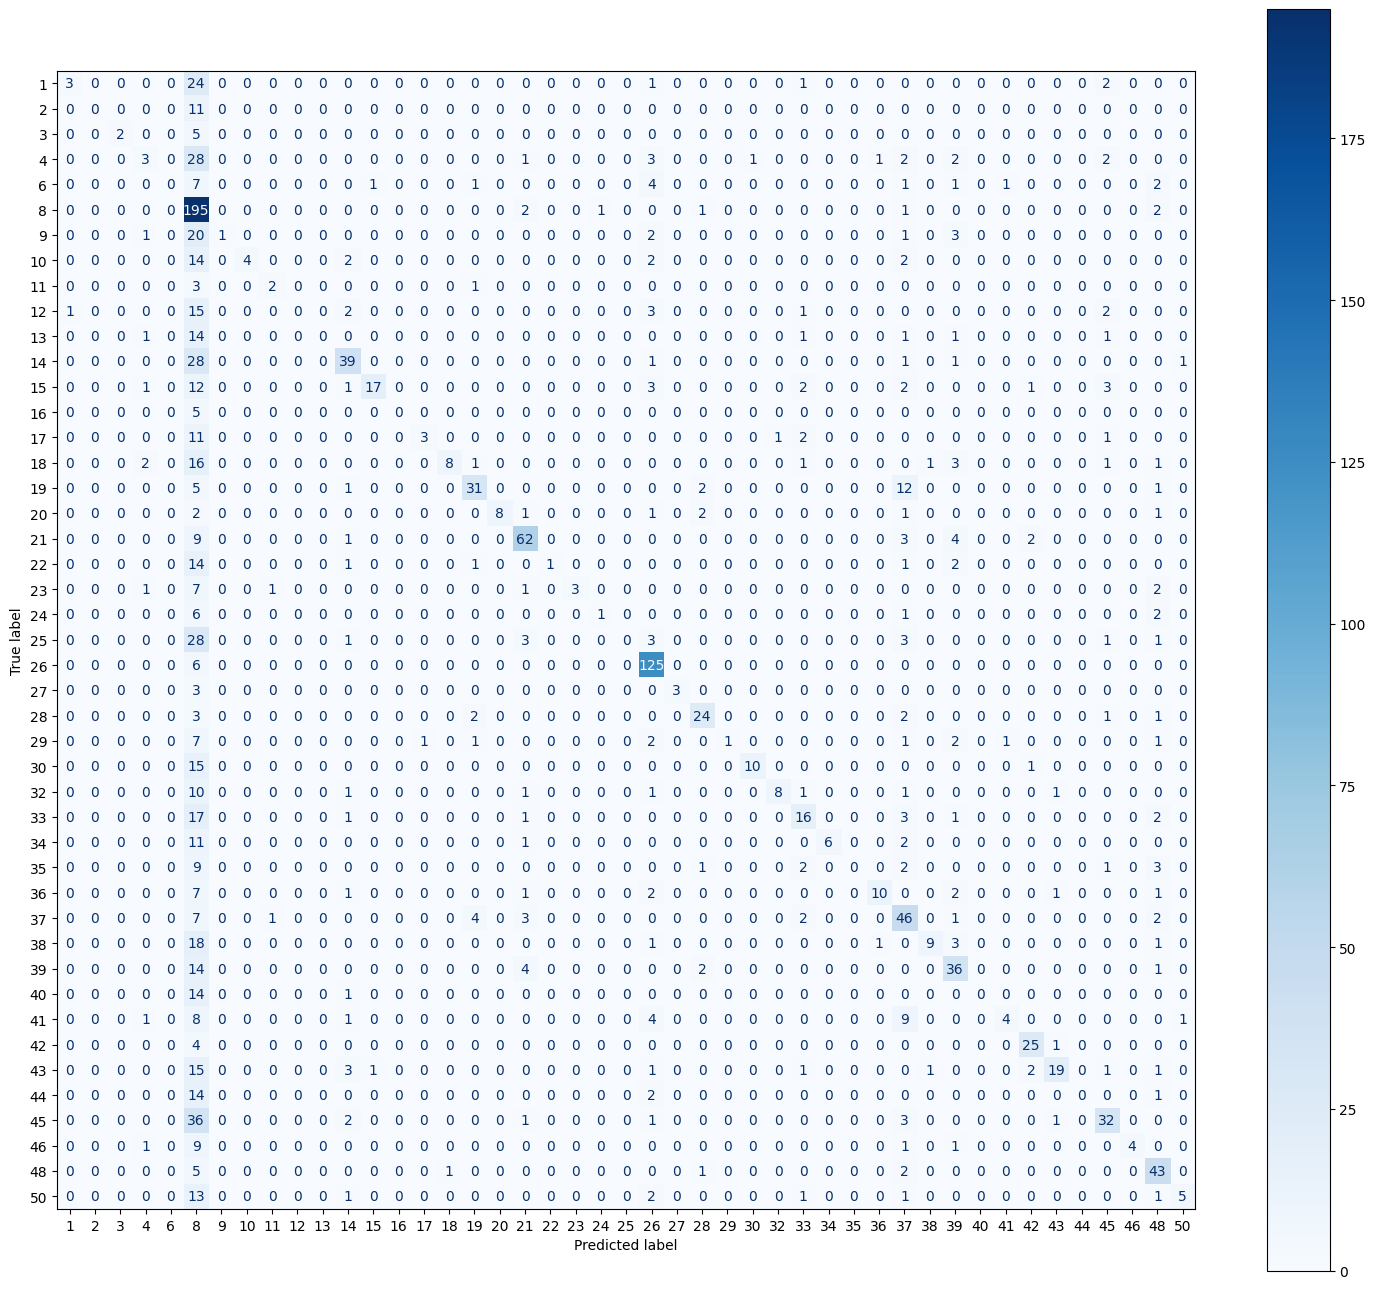

In [ ]:
from sklearn.ensemble import RandomForestClassifier

n_estimators = 100
criterion    = 'entropy'
max_depth    = 12
rf           = RandomForestClassifier(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth, random_state=2)
rf           = rf.fit(X_train, y_train)


predicted_rf     = rf.predict(X_train)
predicted_t_rf   = rf.predict(X_test)
cm_train_rf      = confusion_matrix(y_train, predicted_rf, labels=rf.classes_)
report_tr_rf     = classification_report(y_train, predicted_rf, labels=rf.classes_)
cm_test_rf       = confusion_matrix(y_test, predicted_t_rf, labels=rf.classes_)
report_te_rf     = classification_report(y_test, predicted_t_rf, labels=rf.classes_)
print("Report classificazione training set:\n {}\n".format(report_tr_rf))
print("Report classificazione test set:\n {}\n".format(report_te_rf))


fig, ax2 = plt.subplots(1, 1, figsize=(15, 13))
disp_t   = ConfusionMatrixDisplay(confusion_matrix=cm_test_rf, display_labels=rf.classes_)
disp_t.plot(ax=ax2, cmap=plt.cm.Blues)

ax2.grid(False)
plt.tight_layout()
plt.show()

Dal report sui dati di training e di test, emerge chiaramente come il modello si sia adattato troppo al training set:
* accuracy training set pari a 100%;
* accuracy sul test set pari a 50%.

Tuttavia, effettuando diverse modifiche al variare della profondità massima degli alberi e del numero di alberi utilizzari, la performance del 50% sui dati di test è stata la migliore osservata.

Interpretando i risultati sulla matrice di confusione, il predittore risulta sbilanciato a favore della classe 8 (la classe maggioritaria), ed è questo l'unico grande errore che commette. Tale osservazione è corente con il comportamento tipico del modello rispetto a dataset sbilanciati.

Prime partizioni dell'albero numero 19 della random forest


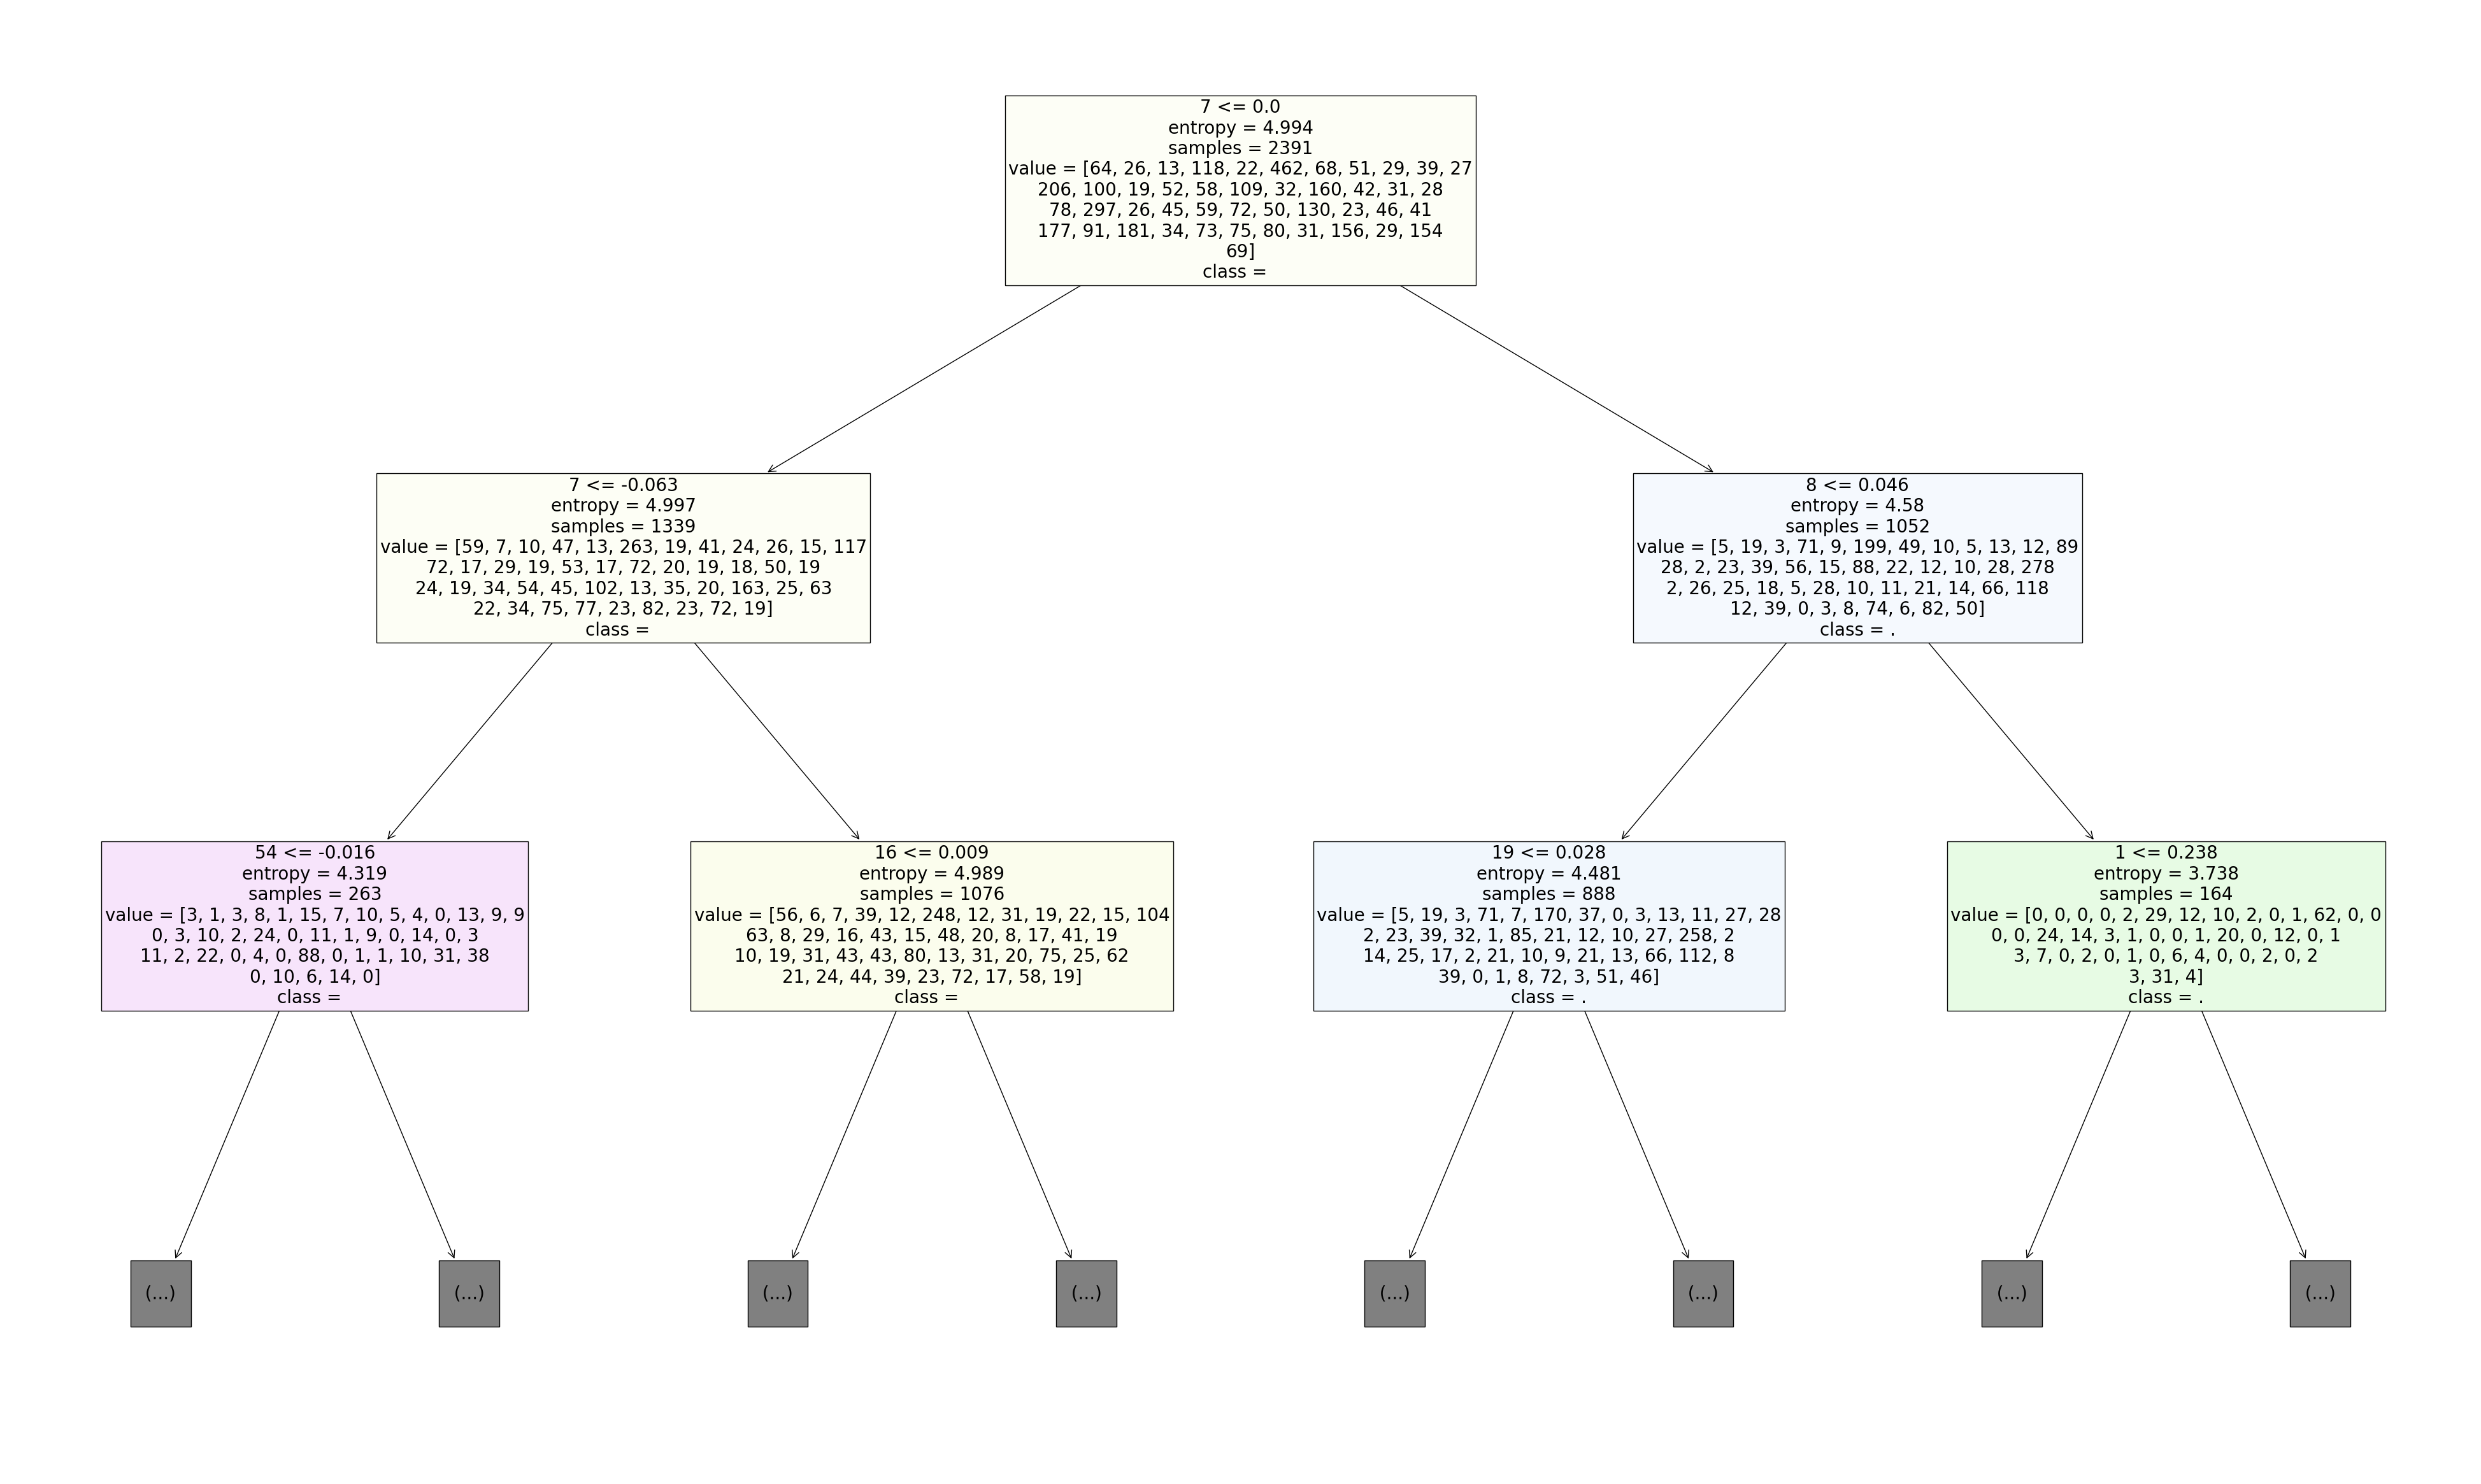

In [ ]:
from sklearn import tree

na = 18
decision_tree = rf.estimators_[na]
fig, ax = plt.subplots(figsize=(50, 30))
tree.plot_tree(decision_tree, ax=ax, fontsize=20, max_depth=2, feature_names=np.arange(1,k+1), class_names=list(str(decision_tree.classes_)), filled=True)
print("Prime partizioni dell'albero numero {} della random forest".format(na+1))
plt.show()

# SUPPORT VECTOR MACHINE <a name="svm"></a>

Questo modello cerca la miglior separazione lineare dello spazio, costituita da un iperpiano $k-1$ dimensionale.
La SVM non converge se le classi non sono linearmente separabili, dunque si è scelto di applicare il modello nella variante _soft margin_.
\begin{equation}
\begin{aligned}
\min \quad & \frac{1}{2}\left\|\textbf{w} \right\|^2+C\sum_{i=1}^{n} \xi_i^2\\
\end{aligned}
\end{equation}
La funzione obiettivo della formulazione del problema possiede un termine aggiuntivo che considera il contributo degli errori del modello attraverso le variabili di slack ($\xi_{i}$). Questa aggiunta serve per la regolarizzazione e viene pesata attraverso l'iperparamentro $C$: più decresce più stiamo alleggerendo il peso degli errori dello specifico dataset. Per imparare il miglior valore di $C$ è stata eseguita una cross validation.

Nella costruzione del modello vengono specificati i seguenti parametri:
* ```decision_function_shape = 'ovr'``` è la strategia utilizzata per l'estensione della SVM al problema multiclasse. Addestra un classificatore binario per ciascuna classe atto a distinguerla dalle altre;
* ```kernel ='rbf'``` è il kernel gaussiano (Radial Basis Function). La formulazione della funzione kernel ha in sè l'iperparametro $\gamma$ che sarà oggetto di cross validation. Al crescare di $\gamma$ diminuisce l'influenza dei punti vicini.
$$ k(x_i,x_j) = e^{-\gamma\left\|\textbf{x}_i- \textbf{x}_j \right\|^2}$$

Il miglior valore di gamma tra quelli analizzati è 0.7000000000000001
Il miglior valore di C tra quelli analizzati è 8


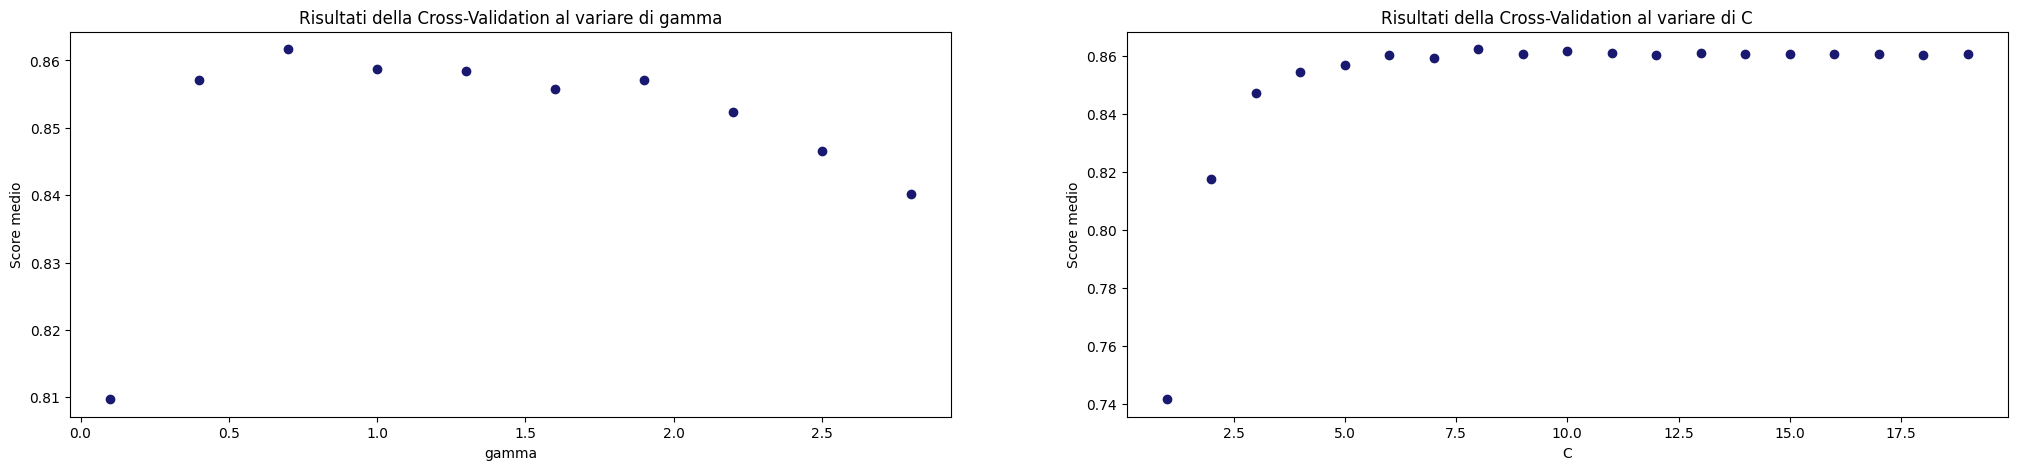

In [ ]:
# CROSS VALIDATION PER C

decision_function_shape = 'ovr'
max_iter = 100
kernel   = 'rbf'

mean_score_g  = []
mean_score_c  = []
gamma_values = np.arange(0.1, 3.1, 0.3)
c_values     = np.arange(1, 20, 1)
iterations_g = len(gamma_values)
iterations_c = len(c_values)
i = 1
j = 1



for g in gamma_values:

    print_progress(i, iterations_g)

    svm_model = svm.SVC(C=10, max_iter=max_iter, kernel=kernel, decision_function_shape=decision_function_shape, gamma=g)
    scores    = cross_val_score(svm_model, X_train, y_train, cv=10,scoring='f1_micro')
    mean_score_g.append(np.mean(scores))
    i += 1

best_gamma = gamma_values[np.argmax(mean_score_g)]
print("Il miglior valore di gamma tra quelli analizzati è {}".format(best_gamma))


for c in c_values:

    print_progress(j, iterations_c)

    svm_model = svm.SVC(C=c, max_iter=max_iter, kernel=kernel, decision_function_shape=decision_function_shape, gamma=best_gamma)
    scores    = cross_val_score(svm_model, X_train, y_train, cv=10,scoring='f1_micro')
    mean_score_c.append(np.mean(scores))
    j += 1

best_c = c_values[np.argmax(mean_score_c)]
print("Il miglior valore di C tra quelli analizzati è {}".format(c_values[np.argmax(mean_score_c)]))


fig, axes = plt.subplots(1, 2, figsize=(25, 5))
axes[0].scatter(gamma_values, mean_score_g, color='midnightblue')
axes[0].set(xlabel='gamma', ylabel='Score medio', title='Risultati della Cross-Validation al variare di gamma')

axes[1].scatter(c_values, mean_score_c, color='midnightblue')
axes[1].set(xlabel='C', ylabel='Score medio', title='Risultati della Cross-Validation al variare di C')

plt.show()




***Commenti***:

Si nota come all'aumentare di $C$ le prestazioni rimangano stazionarie. Dato che vogliamo allontaraci dalla soluzione _hard margin_ sono preferiti valori di C più piccoli. Infatti, per $C\to\infty $ il problema _soft margin_ tende a coincidere con quello _hard margin_.

Il grafico sulla sinistra si presta a considerazioni interessanti: l'aumentare di $\gamma$ porta a un iniziale giovamento nelle performance, infatti vediamo un picco nell'intorno di $1$. Tuttavia, è possibile notare che l'aumento eccessivo di $\gamma$ è degradante in quanto si sta riducendo troppo il raggio d'influenza degli elementi e questo non consente di catturare le dinamiche dei dati.

La miglior coppia di iperparametri restituita dalla cross validation  è $(C,\gamma)=(8,0.7)$. Il modello finale viene addestrato con $(C,\gamma)=(8,1)$.

Report classificazione training set:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        61
           2       1.00      1.00      1.00        28
           3       1.00      1.00      1.00        15
           4       1.00      1.00      1.00       106
           6       1.00      1.00      1.00        23
           8       1.00      1.00      1.00       490
           9       1.00      1.00      1.00        83
          10       1.00      1.00      1.00        52
          11       1.00      1.00      1.00        33
          12       1.00      1.00      1.00        39
          13       1.00      1.00      1.00        30
          14       1.00      1.00      1.00       199
          15       1.00      1.00      1.00       104
          16       1.00      1.00      1.00        14
          17       1.00      1.00      1.00        48
          18       1.00      1.00      1.00        74
          19       1.00      1.00      1.00

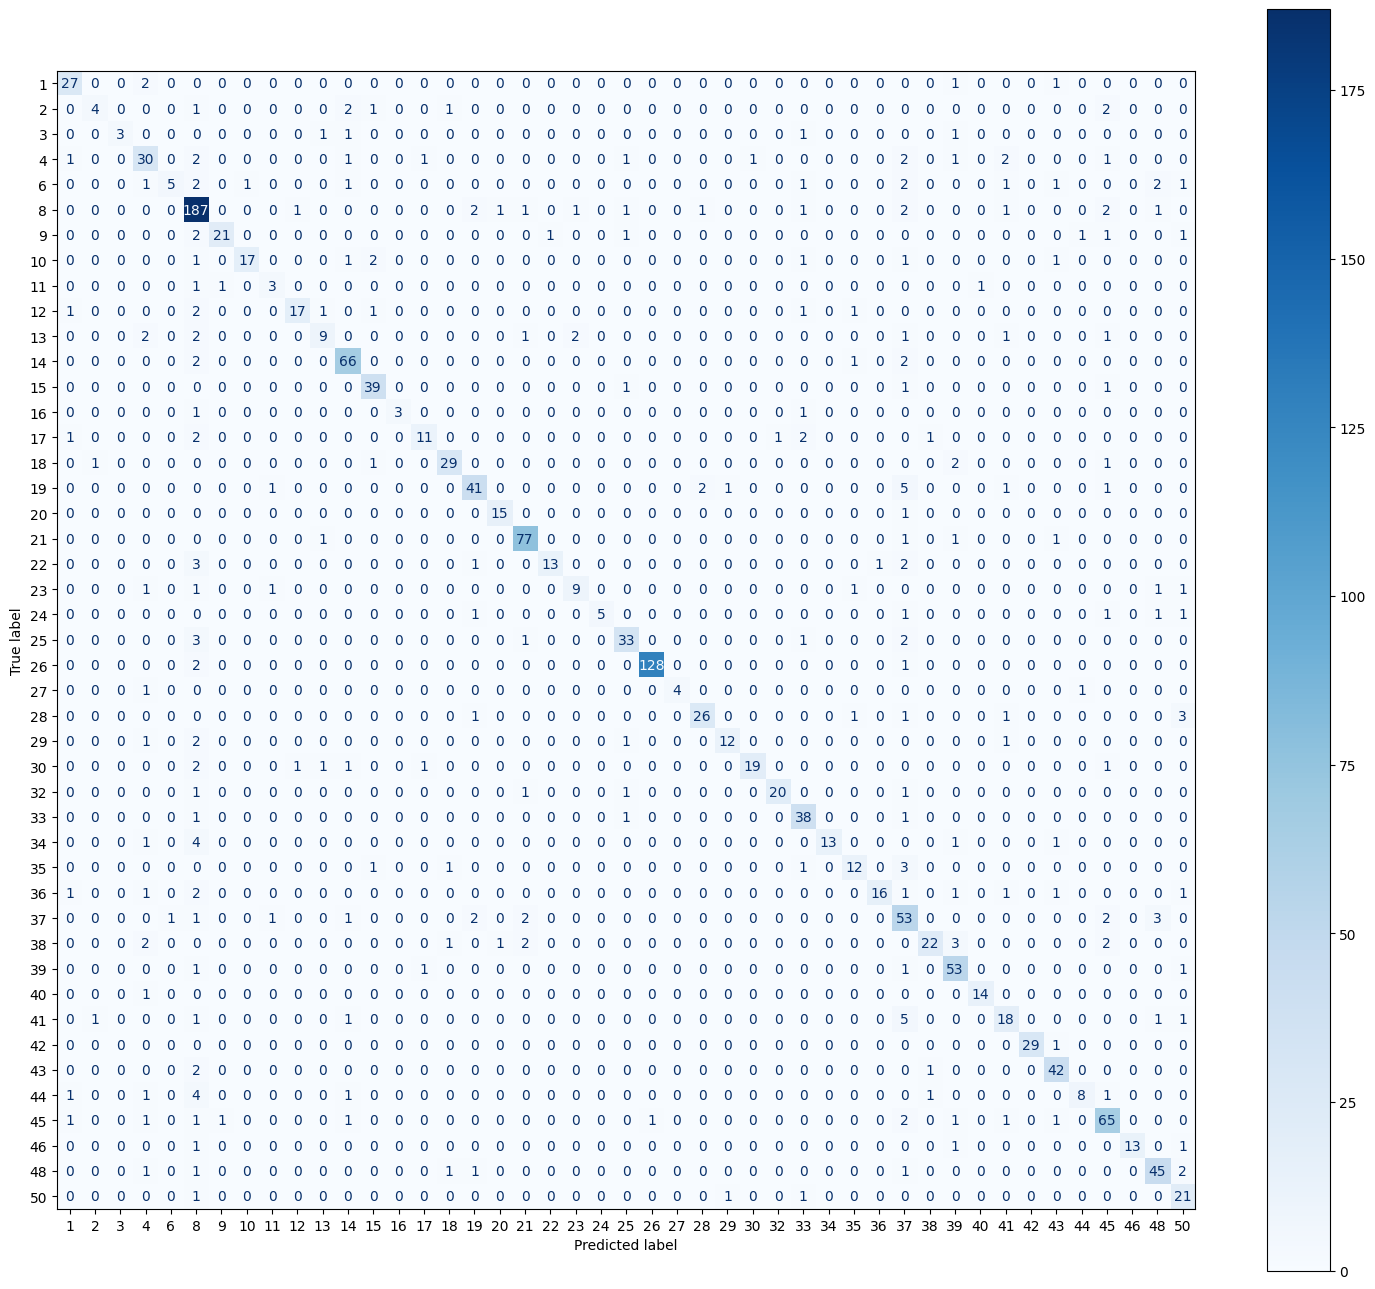

In [ ]:
# ADDESTRAMENTO DEL MODELLO FINALE E MATRICE DI CONFUSIONE
import matplotlib.cm as cm

decision_function_shape = 'ovr'
max_iter = 100
kernel = 'rbf'


svm_model = svm.SVC(C=8, max_iter=max_iter, kernel=kernel, decision_function_shape=decision_function_shape, gamma=1)
svm_model.fit(X_train, y_train)
score     = svm_model.score(X_train, y_train)
score_t   = svm_model.score(X_test, y_test)

predicted   = svm_model.predict(X_train)
predicted_t = svm_model.predict(X_test)
cm_train    = confusion_matrix(y_train, predicted, labels=svm_model.classes_)
report_tr   = classification_report(y_train, predicted, labels=svm_model.classes_)
cm_test     = confusion_matrix(y_test, predicted_t, labels=svm_model.classes_)
report_te   = classification_report(y_test, predicted_t, labels=svm_model.classes_)
print("Report classificazione training set:\n {}\n".format(report_tr))
print("Report classificazione test set:\n {}\n".format(report_te))


fig, ax2 = plt.subplots(1, 1, figsize=(15, 13))
disp_t   = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=svm_model.classes_)
disp_t.plot(ax=ax2, cmap=plt.cm.Blues)

ax2.grid(False)
plt.tight_layout()
plt.show()

Per valutare il modello si deve far riferimento alle metriche _micro_ in quanto le classi del dataset risultano sbilanciate. Il report non le stampa perché identiche all'accuracy.

Il modello prodotto mediante le _soft margin SVM_ commette maggiormente i seguenti errori:
* la classe 19 viene spesso scambiata per la classe 37 (5 errori);
* la classe 41 viene spesso scambiata per la classe 37 (5 errori).

Inoltre, si osserva che il modello sbaglia il più delle volte assegnando la classe 8 a istanze appartenenti ad altre classi. Tale classe è la maggioritaria, ed è normale che i modelli di machine learning tendano a dare una classificazione che favorisce le classi più numerose in un dataset sbilanciato. Le SVM solitamente si annoverano tra gli algoritmi che meglio riescono a gestire questo tipo di dataset.

# SOFTMAX REGRESSION <a name="soft"></a>

Il terzo modello considerato rappresenta l'estensione multiclasse della regressione logistica. Si tratta di un modello discriminativo che, al contrario dei modelli generativi, non acquisisce conoscenza su come sono fatte le classi, ma risulta più robusto e semplice rispetto a questi ultimi.

La softmax regression modella la probabilità condizionata dei target nel training set attraverso una distribuzione categorica il cui parametro è: $$p_{ij} = p(C_j|\textbf{x}_i) = s(\textbf{w}\cdot \textbf{x}_i)$$ ovvero viene calcolato grazie alla funzione _softmax_.


L'algoritmo che viene usato per risolvere il problema di ottimizzazione dei parametri è ```lbfgs```, in grado di gestire la loss multinomiale. Inoltre, si prevede un termine di regolarizzazione $C$, il cui funzionamento è analogo al caso della SVM.


Cross validation in corso: 100.0% [==========>]
Mean Scores: [0.6133131236579512, 0.7892993979200875, 0.823222180118732, 0.8343529395253533, 0.8425680322232048, 0.8465454086143742, 0.8510532889843235, 0.852112893492204, 0.8550271567512947, 0.8560881647088543, 0.856354118423084, 0.8579449286345838, 0.856883920677024, 0.8568846224018637, 0.856883920677024, 0.8574137229309644, 0.8566186686876343, 0.8579442269097441, 0.857414424655804, 0.8576789749203542]
0.6133131236579512


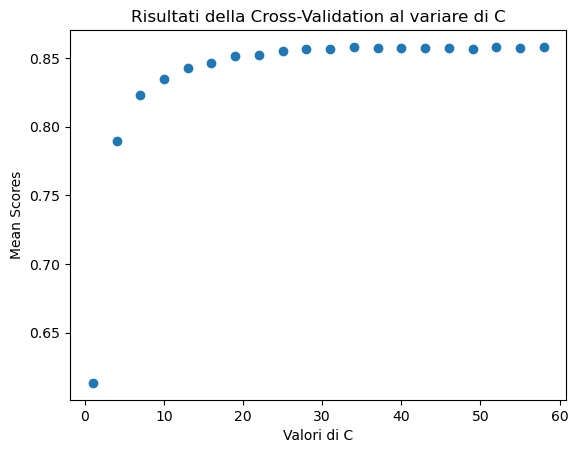

Il miglior valore di C tra quelli analizzati è 34


In [ ]:
# CROSS VALIDATION PER IPERPARAMETRO DI REGOLARIZZAZIONE C

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, mutual_info_classif


mean_scores_s = []
c_values_s    = np.arange(1, 60, 3)
iterations    = len(c_values_s)
i = 1

for c in c_values_s:

    print_progress(i, iterations)

    softmax_model = LogisticRegression(C=c)
    scores = cross_val_score(softmax_model, X_train, y_train, cv=10,scoring='f1_micro')
    mean_scores_s.append(np.mean(scores))
    i += 1



plt.scatter(c_values_s, mean_scores_s)
plt.xlabel('C')
plt.ylabel('Score medio')
plt.title('Risultati della Cross-Validation al variare di C')
plt.show()

print("Il miglior valore di C tra quelli analizzati è {}".format(c_values_s[np.argmax(mean_scores_s)]))

Report classificazione training set:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        61
           2       1.00      1.00      1.00        28
           3       1.00      1.00      1.00        15
           4       0.98      0.94      0.96       106
           6       1.00      1.00      1.00        23
           8       0.99      1.00      0.99       490
           9       1.00      1.00      1.00        83
          10       1.00      1.00      1.00        52
          11       1.00      1.00      1.00        33
          12       1.00      1.00      1.00        39
          13       1.00      1.00      1.00        30
          14       1.00      1.00      1.00       199
          15       1.00      1.00      1.00       104
          16       1.00      0.93      0.96        14
          17       1.00      1.00      1.00        48
          18       1.00      1.00      1.00        74
          19       1.00      0.99      1.00

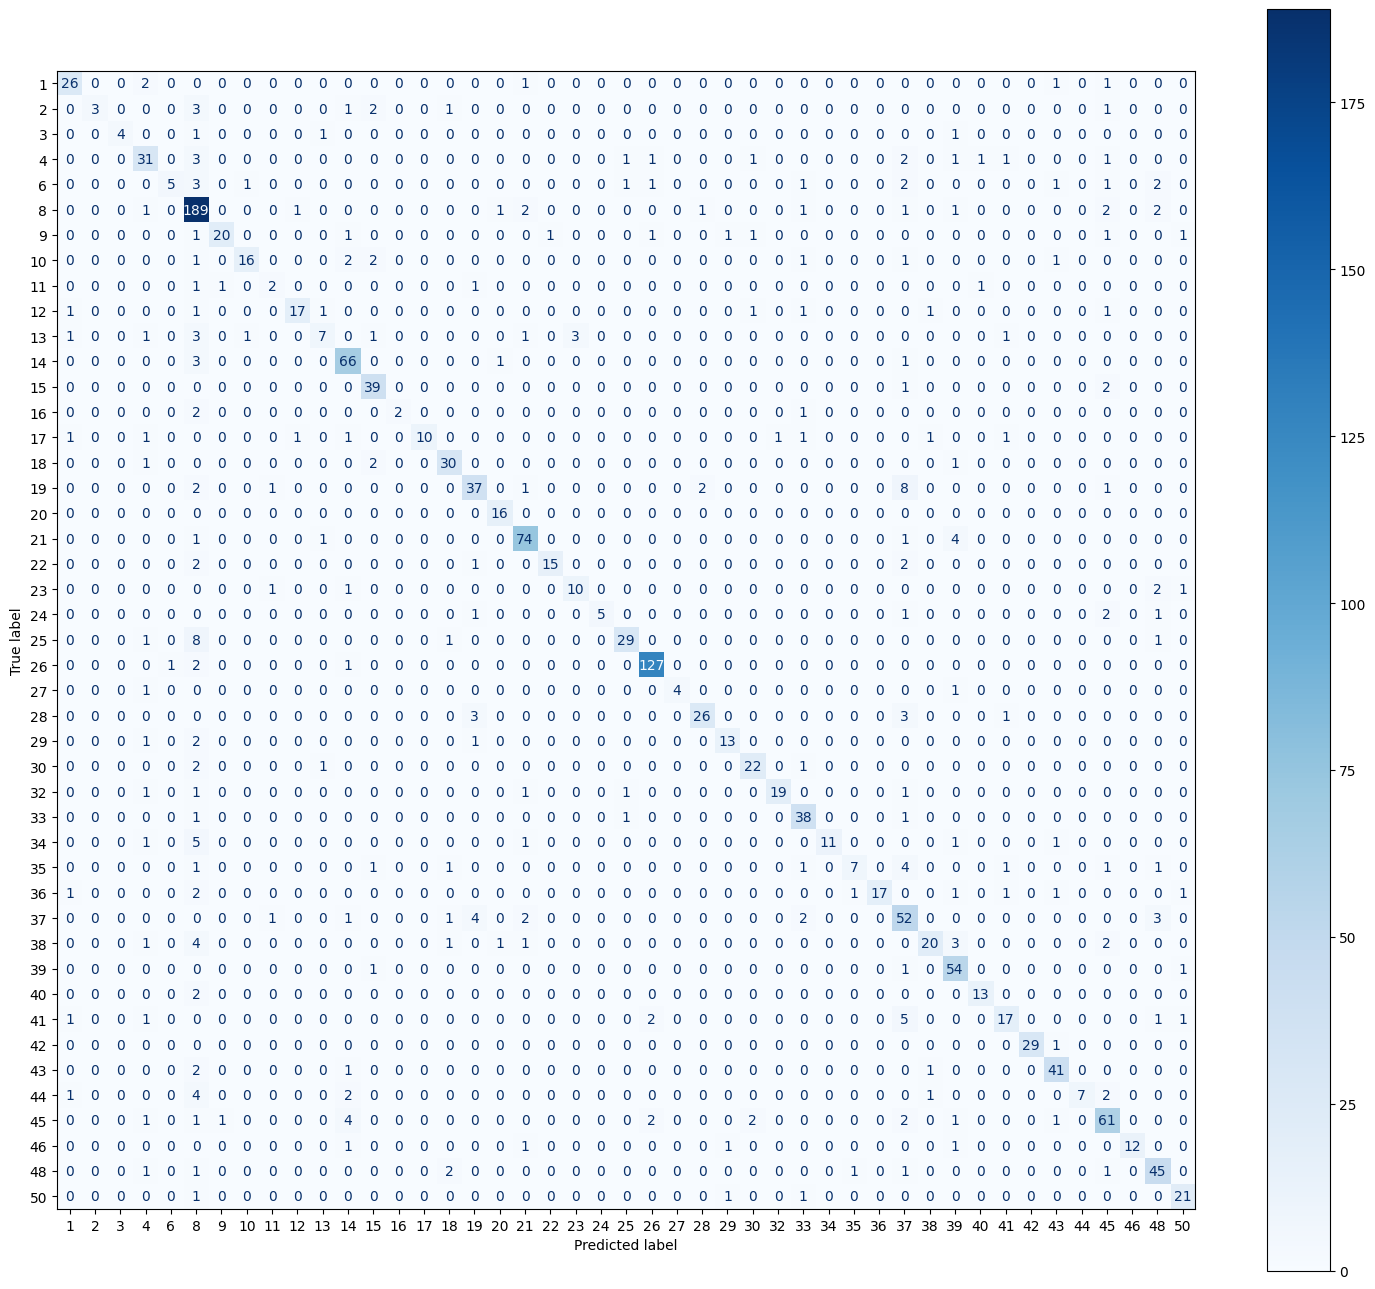

In [ ]:
from sklearn.linear_model import LogisticRegression


C_s = 34
softmax = LogisticRegression(C=C_s)
softmax.fit(X_train, y_train)

# la classe predetta da softmax.predict() è ottenuta facendo l'argmax tra le probabilità predette per le varie classi
predicted_s     = softmax.predict(X_train)
predicted_t_s   = softmax.predict(X_test)
cm_train_s      = confusion_matrix(y_train, predicted_s, labels=softmax.classes_)
report_tr_s     = classification_report(y_train, predicted_s, labels=softmax.classes_)
cm_test_s       = confusion_matrix(y_test, predicted_t_s, labels=softmax.classes_)
report_te_s     = classification_report(y_test, predicted_t_s, labels=softmax.classes_)
print("Report classificazione training set:\n {}\n".format(report_tr_s))
print("Report classificazione test set:\n {}\n".format(report_te_s))


fig, ax2 = plt.subplots(1, 1, figsize=(15, 13))
disp_t   = ConfusionMatrixDisplay(confusion_matrix=cm_test_s, display_labels=softmax.classes_)
disp_t.plot(ax=ax2, cmap=plt.cm.Blues)

ax2.grid(False)
plt.tight_layout()
plt.show()

Dalla matrice di confusione si osservano errori analoghi al modello precedente:
* la classe 19 viene spesso scambiata per la classe 37 (10 errori);
* la classe 25 viene spesso scambiata per la classe 8 (7 errori) e, in generale, il modello sbaglia il più delle volte assegnando la classe 8 a istanze appartenenti ad altre classi.

Le performance, dunque, sono analoghe al modello _soft margin SVM_, sia in termini di valori assoluti che di tipologia di errori commessi. Molto probabilmente, essendo un pattern ricorrente, le classi 19 e 37 risultano essere particolarmente simili ma per concluderlo è necessario uno studio più accurato delle due classi.

# MULTILAYER PERCEPTRON <a name="mlp"></a>

Il quarto modello considerato è la prima e più semplice struttura di una rete neurale. Presenta una serie di strati di neuroni, dove ciascun layer sposta il problema su un nuovo spazio. Ogni neurone della rete (tranne se appartenente all'input layer) rappresenta l'applicazione di una funzione non lineare sulla combinazione degli output dei neuroni nel layer precedente. In questo modo, tale struttura riesce a gestire problemi anche non linearmente separabili, come nel caso in questione.

La struttura della rete presenta alcuni parametri da definire a priori:
* numero di layer della rete;
* numero di neuroni per ogni layer;
* funzione di attivazione per ogni neurone (deve essere una funzione monotona non decrescente).

Nell'ultimo layer (detto *output layer*), la funzione di attivazione e il numero di neuroni sono strettamente legati al task. Nel caso analizzato, l'output layer sarà composto da tanti neuroni quante sono gli autori (classi) e dalla funzione di attivazione _softmax_. In questo modo l'output della rete può essere considerato una probabilità: si sceglierà di assegnare l'istanza di input alla classe che raggiunge il massimo.


Per sviluppare il modello, è stata utilizzata la classe _MLPClassifier_. A causa dell'elevato numero di iperparametri da apprendere, sono state effettuate le seguenti scelte:
* la funzione di attivazione per i neuroni degli hidden layer è la ReLU (opzione di default);
* la funzione di loss è logaritmica (*log loss*: $L(t,y) =\frac{1}{log2} \cdot log(1+e^{-yt})$) e rappresenta una scelta non modificabile;
* il termine di regolarizzazione $\alpha$ è stato lasciato al valore di default (0.0001);
* per l'ottimizzazione della loss è stato scelto l'algoritmo Mini Batch Gradient Descent con dimensione dei batch pari a 200;
* il learning rate iniziale $\eta$ verrà posto pari a 0.5, valore abbastanza elevato, ma nelle iterazioni della discesa del gradiente verrà aggiornato in modo adattivo: rimarrà costante finché due epoche consecutive avranno una differenza nel validation score maggiore di una certa tolleranza (di defalut pari a $e^{-4}$). Altrimenti verrà scalato di un fattore pari a 5;
* si fa uso della tecnica di regolarizzazione "early stopping" (validation set = 10%) che blocca la discesa del gradiente se la loss non migliora per un numero di epoche pari a ```n_iter_no_change```.


Mean Scores: [0.8426666666666668, 0.8526666666666667, 0.8555555555555555, 0.8513333333333332, 0.8491111111111111, 0.3922222222222222]
0.8426666666666668


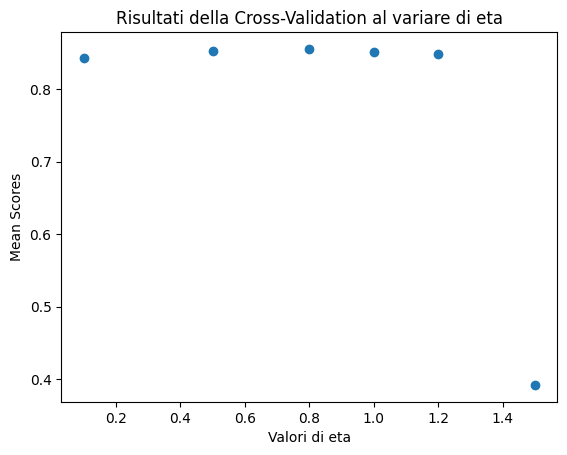

Il miglior valore di eta tra quelli analizzati è 0.8


In [ ]:
from sklearn.neural_network import MLPClassifier

mean_scores_m = []
eta_values_m  = (0.1, 0.5, 0.8, 1, 1.2, 1.5)
iterations    = len(eta_values_m)
i = 1

for c in eta_values_m:

    print_progress(i, iterations)

    mlp  = MLPClassifier(hidden_layer_sizes=(100), solver='sgd', activation="relu", learning_rate='adaptive', learning_rate_init=c, random_state=1, early_stopping=True, n_iter_no_change=10)
    scores = cross_val_score(mlp, X_train, y_train, cv=5,scoring='f1_micro')
    mean_scores_m.append(np.mean(scores))
    i += 1


plt.scatter(eta_values_m, mean_scores_m)
plt.xlabel('eta')
plt.ylabel('Score medio')
plt.title('Risultati della Cross-Validation al variare di eta')
plt.show()

print("Il miglior valore di eta tra quelli analizzati è {}".format(eta_values_m[np.argmax(mean_scores_m)]))

Iteration 1, loss = 3.50454813
Validation score: 0.105820
Iteration 2, loss = 3.19626648
Validation score: 0.256614
Iteration 3, loss = 2.78181739
Validation score: 0.367725
Iteration 4, loss = 2.38252453
Validation score: 0.492063
Iteration 5, loss = 2.00418326
Validation score: 0.539683
Iteration 6, loss = 1.68463821
Validation score: 0.608466
Iteration 7, loss = 1.39752643
Validation score: 0.624339
Iteration 8, loss = 1.19571967
Validation score: 0.703704
Iteration 9, loss = 0.97892811
Validation score: 0.727513
Iteration 10, loss = 0.83261950
Validation score: 0.738095
Iteration 11, loss = 0.71078252
Validation score: 0.759259
Iteration 12, loss = 0.60921548
Validation score: 0.772487
Iteration 13, loss = 0.51516449
Validation score: 0.793651
Iteration 14, loss = 0.44662550
Validation score: 0.804233
Iteration 15, loss = 0.39479043
Validation score: 0.801587
Iteration 16, loss = 0.34620511
Validation score: 0.825397
Iteration 17, loss = 0.29750627
Validation score: 0.828042
Iterat

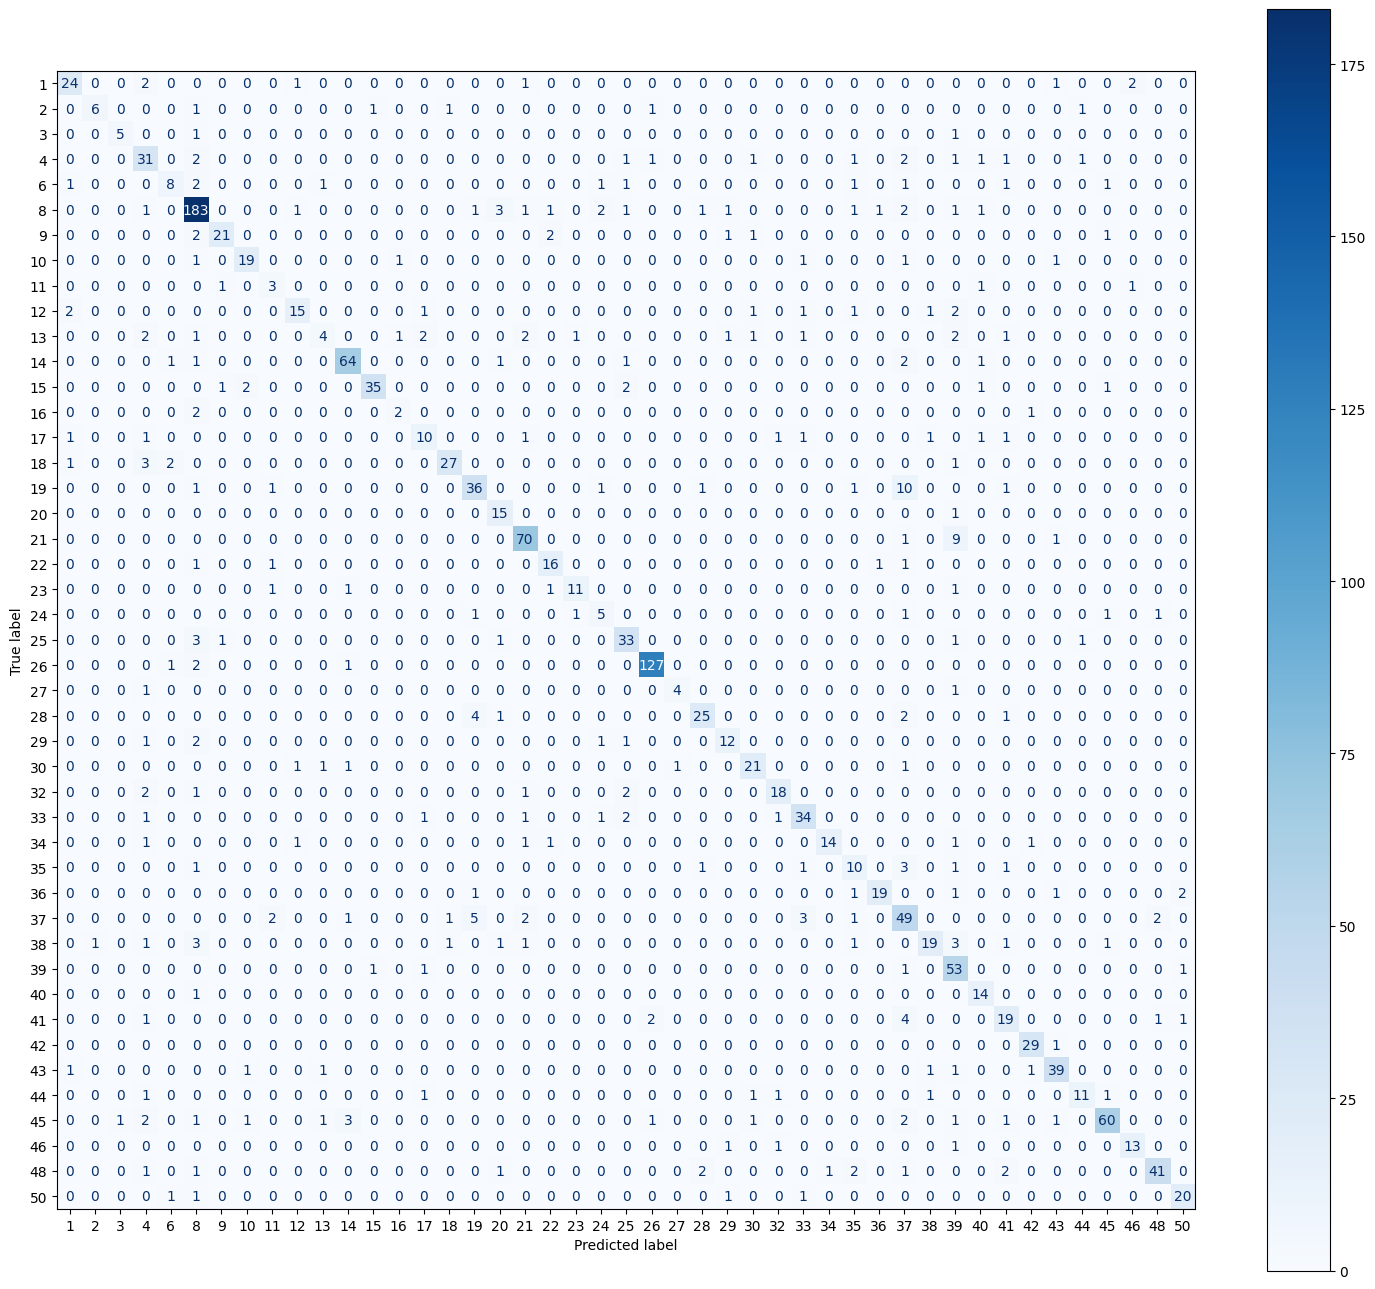

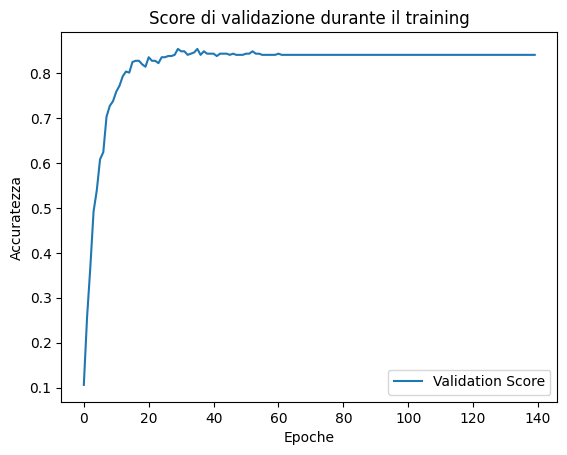

In [ ]:
from sklearn.neural_network import MLPClassifier

eta  = 0.5
size = (1000)
mlp  = MLPClassifier(hidden_layer_sizes=size, solver='sgd', activation="relu", learning_rate='adaptive', verbose = True, learning_rate_init=eta, random_state=1, early_stopping=True, n_iter_no_change=10)
# verbose serve per stampare informazioni sulle epoche
mlp.fit(X_train, y_train)

mlp.predict_proba(X_test)
mlp.predict(X_test)
mlp.score(X_test, y_test)



predicted_m   = mlp.predict(X_train)
predicted_t_m = mlp.predict(X_test)
cm_train_m    = confusion_matrix(y_train, predicted_m, labels=mlp.classes_)
report_tr_m   = classification_report(y_train, predicted_m, labels=mlp.classes_)
cm_test_m     = confusion_matrix(y_test, predicted_t_m, labels=mlp.classes_)
report_te_m   = classification_report(y_test, predicted_t_m, labels=mlp.classes_)
print("Report classificazione training set:\n {}\n".format(report_tr_m))
print("Report classificazione test set:\n {}\n".format(report_te_m))


fig, ax2 = plt.subplots(1, 1, figsize=(15, 13))
disp_t   = ConfusionMatrixDisplay(confusion_matrix=cm_test_m, display_labels=mlp.classes_)
disp_t.plot(ax=ax2, cmap=plt.cm.Blues)

ax2.grid(False)
plt.tight_layout()
plt.show()


validation_score = mlp.validation_scores_
plt.plot(validation_score, label='Validation Score')
plt.xlabel('Epoche')
plt.ylabel('Accuratezza')
plt.title('Score di validazione durante il training')
plt.legend()
plt.show()


***Commenti***:

Il multilayer perceptron sviluppato ha lo stesso problema degli altri modelli, ovvero confonde qualche volta la classe 19 con la 37. Motivo per cui si rafforza l'ipotesi della similarità tra queste due classi.

Come osservato nelle matrici di confusione dei modelli precedenti, si tendeva ad assegnare molto spesso la classe 8 a istanze appartenenti ad altre classi. Con il multilayer perceptron, si osservano errori più distribuiti nelle varie classi, anche se ancora si nota una propensione a favorire l'assegnamento della classe 8.


\

***Considerazioni sulla struttura***:

La scelta di una rete neurale di questo tipo è stata dovuta a una serie di prove effettuate al variare della struttura. Teoricamente, sarebbe stato opportuno procedere con una cross validation per definire il numero di neuroni in ogni layer e il numero di layer. Tuttavia, il costo computazionale rende molto oneroso questo procedimento.

Introdurre un unico hidden layer è stata una scelta che ha fatto seguito alle seguenti osservazioni:
* rete con 20 layer da 100 neuroni classifica tutte le istanze nella classe 8
* rete con 50 layer da 100 neuroni classifica tutte le istanze nella classe 8
* rete con 50 layer da 200 neuroni classifica tutte le istanze nella classe 8
* rete con 100 layer da 10 neuroni classifica tutte le istanze nella classe 8

Queste sono solo alcune delle evidenze empiriche e mostrano chiaramente un comportamento estremo. Diminuendo il numero di layer e aumentando il numero di neuroni per ogni layer, ci si è allontanati da questa situazione iniziando ad ottenere delle prestazioni migliori, seppur ridotte (e.g. una rete con 10 layer da 600 neuroni ciascuno ottiene un'accuracy di 0.26). Le prestazioni più elevate sul test set sono state ottenute con reti composte da un solo hidden layer.


Si è osservato empiricamente come, nel problema affrontato, le reti _shallow_ performino molto meglio delle reti _deep_. Sembra un risultato controintuitivo, ma la scelta della dimensione dell'hidden layer dipende fortemente dal dataset e dal problema specifico che si sta affrontando. Problemi complessi, feature numerose e un elevato numero di esempi potrebbero richiedere un numero maggiore di neuroni nell'hidden layer per modellare in modo adeguato la complessità dei dati.

# CONFRONTO TRA MODELLI <a name="conf"></a>


I modelli sviluppati sono:
* Random Forest;
* Support Vector Machine;
* Softmax Regression;
* Multilayer Perceptron.

Al fine di effettuare un confronto tra le prestazioni ottenute, verranno graficate le principali metriche di performance.

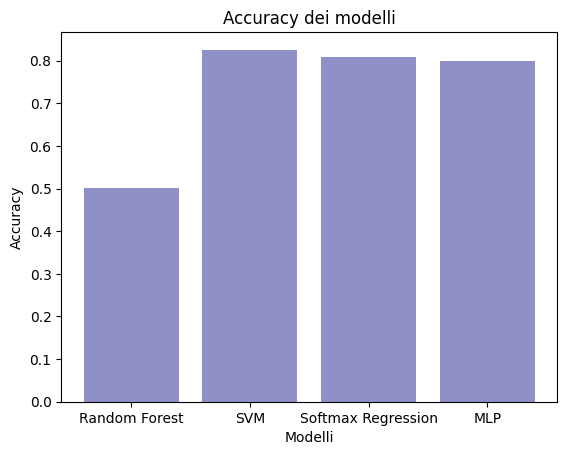

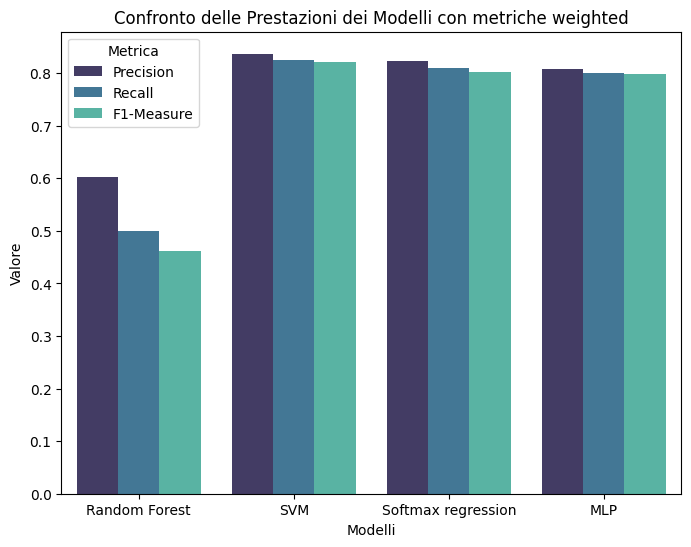

In [ ]:
import seaborn as sns
report_te_rfv = classification_report(y_test, predicted_t_rf, labels=rf.classes_, output_dict=True)
report_te_svm = classification_report(y_test, predicted_t, labels=svm_model.classes_, output_dict=True)
report_te_sm  = classification_report(y_test, predicted_t_s, labels=softmax.classes_, output_dict=True)
report_te_mlp = classification_report(y_test, predicted_t_m, labels=mlp.classes_, output_dict=True)


accuracy_model1 = accuracy_score(y_test, predicted_t_rf)
accuracy_model2 = accuracy_score(y_test, predicted_t)
accuracy_model3 = accuracy_score(y_test, predicted_t_s)
accuracy_model4 = accuracy_score(y_test, predicted_t_m)


accuracies  = [accuracy_model1, accuracy_model2, accuracy_model3, accuracy_model4]
model_names = ['Random Forest', 'SVM', 'Softmax Regression', 'MLP']


plt.bar(model_names, accuracies, color=sns.light_palette("darkblue")[2])
plt.xlabel('Modelli')
plt.ylabel('Accuracy')
plt.title('Accuracy dei modelli')
plt.show()


models      = ['Random Forest', 'SVM', 'Softmax regression', 'MLP']
keys        = ['Model', 'Precision', 'Recall', 'F1-Measure']
prestations = [report_te_rfv, report_te_svm, report_te_sm, report_te_mlp]
data        = {k: [] for k in keys}

for i in range(0, len(models)):
    data['Model'].append(models[i])
    data['Precision'].append(prestations[i]['weighted avg']['precision'])
    data['Recall'].append(prestations[i]['weighted avg']['recall'])
    data['F1-Measure'].append(prestations[i]['weighted avg']['f1-score'])
plot_df = pd.DataFrame(data)

colors  = sns.color_palette("mako", 3)
plot_df = plot_df.melt('Model', var_name='Metrica', value_name='Valore')
plt.figure(figsize=(8, 6))
sns.barplot(x='Model', y='Valore', hue='Metrica', data=plot_df, palette=colors)
plt.xlabel('Modelli')
plt.ylabel('Valore')
plt.title('Confronto delle Prestazioni dei Modelli con metriche weighted')
plt.show()

Nel caso di dataset sbilanciati, usualmente vengono utilizzate le *micro averages* per valutare la bontà dei modelli. Infatti, tali misure ($\mu$-Precision, $\mu$-Recall e $\mu$-Fmeasure) permettono di valutare le performance globali di un dato modello, tanto che risultano uguali all'accuracy nel caso in cui ogni elemento del dataset viene assegnato a un'unica classe, come nel caso in questione.

Può essere interessante considerare anche le *weighted averages* per valutare le performance considerando l'importanza relativa delle diverse classi. È un modo alternativo di combinare gli indicatori delle singole classi.

I due grafici riportano in ordine i confronti rispetto all'accuracy e rispetto alle metriche *weighted*.


I due diversi confronti sono in accordo riguardo la bontà dei 4 modelli, restituendo la SVM come il migliore. C'era da aspettarsi un risultato del genere in quanto in letteratura molto spesso la SVM è stata citata tra i modelli più adatti a gestire dati testuali.

# ANALISI DELLE CLASSI <a name="Analisi-delle-classi"></a>

Essendo emerse delle considerazioni interessanti durante l'applicazione dei modelli riguardo la similarità delle varie classi, è opportuno procedere con un'analisi più accurata.

Il dataset a disposizione è stato preprocessato, permettendo una rappresentazione dei testi in uno spazio $k$-dimensionale con $k=300$. Dunque, un testo è rappresentato da un punto su tale spazio. La distanza tra i punti può essere interpretata: rappresenta quanto simili sono i due testi.

Sullo spazio è possibile adottare varie metriche per misurare le distanze. Come prima cosa sarà considerata la distanza eucludea:

$$d(\mathbf{x},\mathbf{y}) = \sqrt{\sum_{i=1}^{n}(x_{i}-y_{i})^{2}}$$

Occorre valutare la distanza tra coppie di classi, pertanto si deve prima arrivare a una rappresentazione vettoriale per la classe. L'approccio più semplice è calcolare il centroide della classe, ovvero costruire un vettore attraverso la media su ciascuna feature dei valori assunti dagli elementi appartenenti a quella classe.

(50,)
(50, 300)


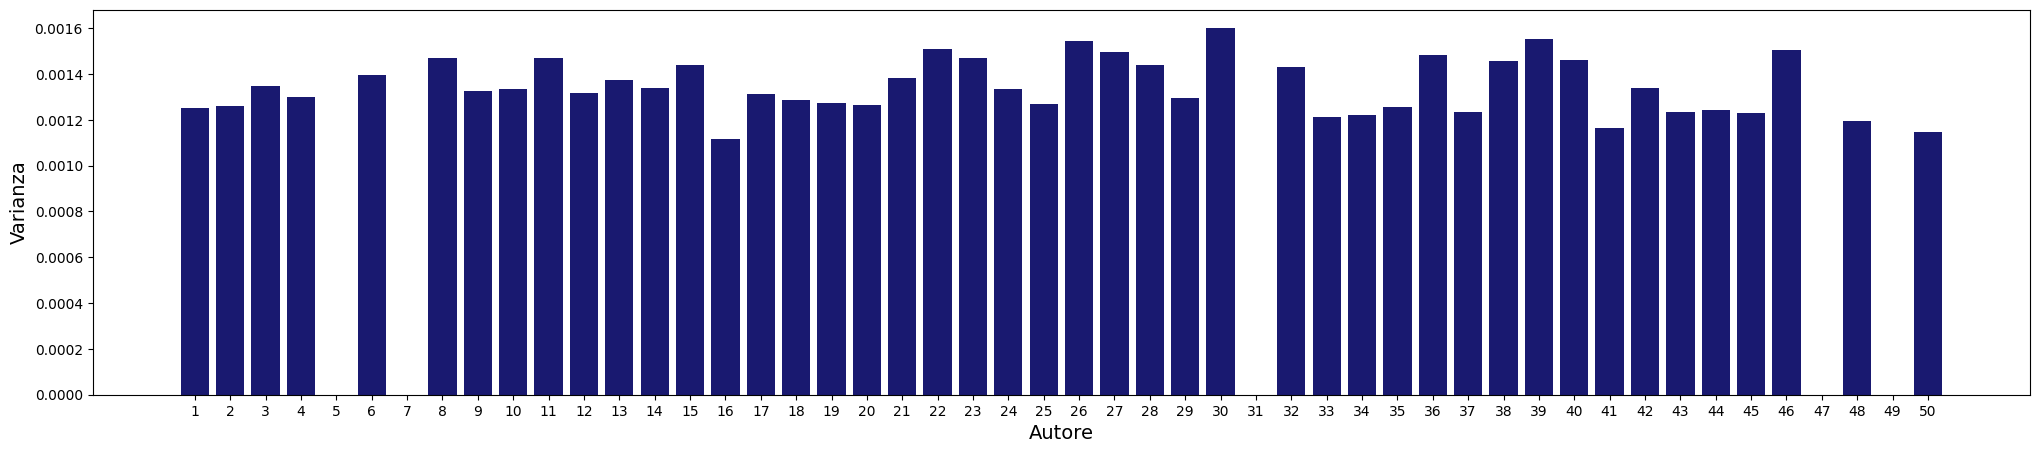

Il valore massimo di varianza 0.0016 si ottiene per la classe 30


In [ ]:
from sklearn.metrics.pairwise import euclidean_distances

n_classi  = 50
classi    = y_train.to_numpy()
centroidi = np.zeros((n_classi, X_train.shape[1]))
count     = np.zeros(n_classi)
variance  = np.zeros(n_classi)

element_in_classes = [[] for i in range(n_classi)]


for i in range(len(X_train)):
    classe = classi[i]
    element_in_classes[classe-1].append(i)
    centroidi[classe-1] += X_train[i]
    count[classe-1] += 1

for i in range(n_classi):
    if count[i] > 0:
        centroidi[i] /= count[i]
    dataset = []
    for j in element_in_classes[i]:
        dataset.append(X_train[j])
    variance[i] = np.var(dataset)


print(variance.shape)
print(centroidi.shape)

x = np.arange(len(variance))
plt.figure(figsize=(25, 5))
plt.bar(x, variance, color='midnightblue')
plt.xticks(x, np.arange(1, n_classi + 1))
plt.xlabel('Autore', fontsize=14)
plt.ylabel('Varianza', fontsize=14)
plt.show()

def find_max_value(vettore):
    max_value = np.nanmax(vettore)
    max_index = np.nanargmax(vettore)

    return max_value, max_index

print("Il valore massimo di varianza {} si ottiene per la classe {}".format(round(find_max_value(variance)[0],4),find_max_value(variance)[1]+1))

***Considerazioni***:

Il grafico riporta la varianza dei punti in una classe. Il valore massimo, pari a 0.0016, si ottiene per la classe 30. Tale valore risulta molto contenuto, dunque è possibile considerare i centroidi come una buona approssimazione della rappresentazione della classe. Infatti, i vettori della classe non si allontanano molto dal loro centroide.


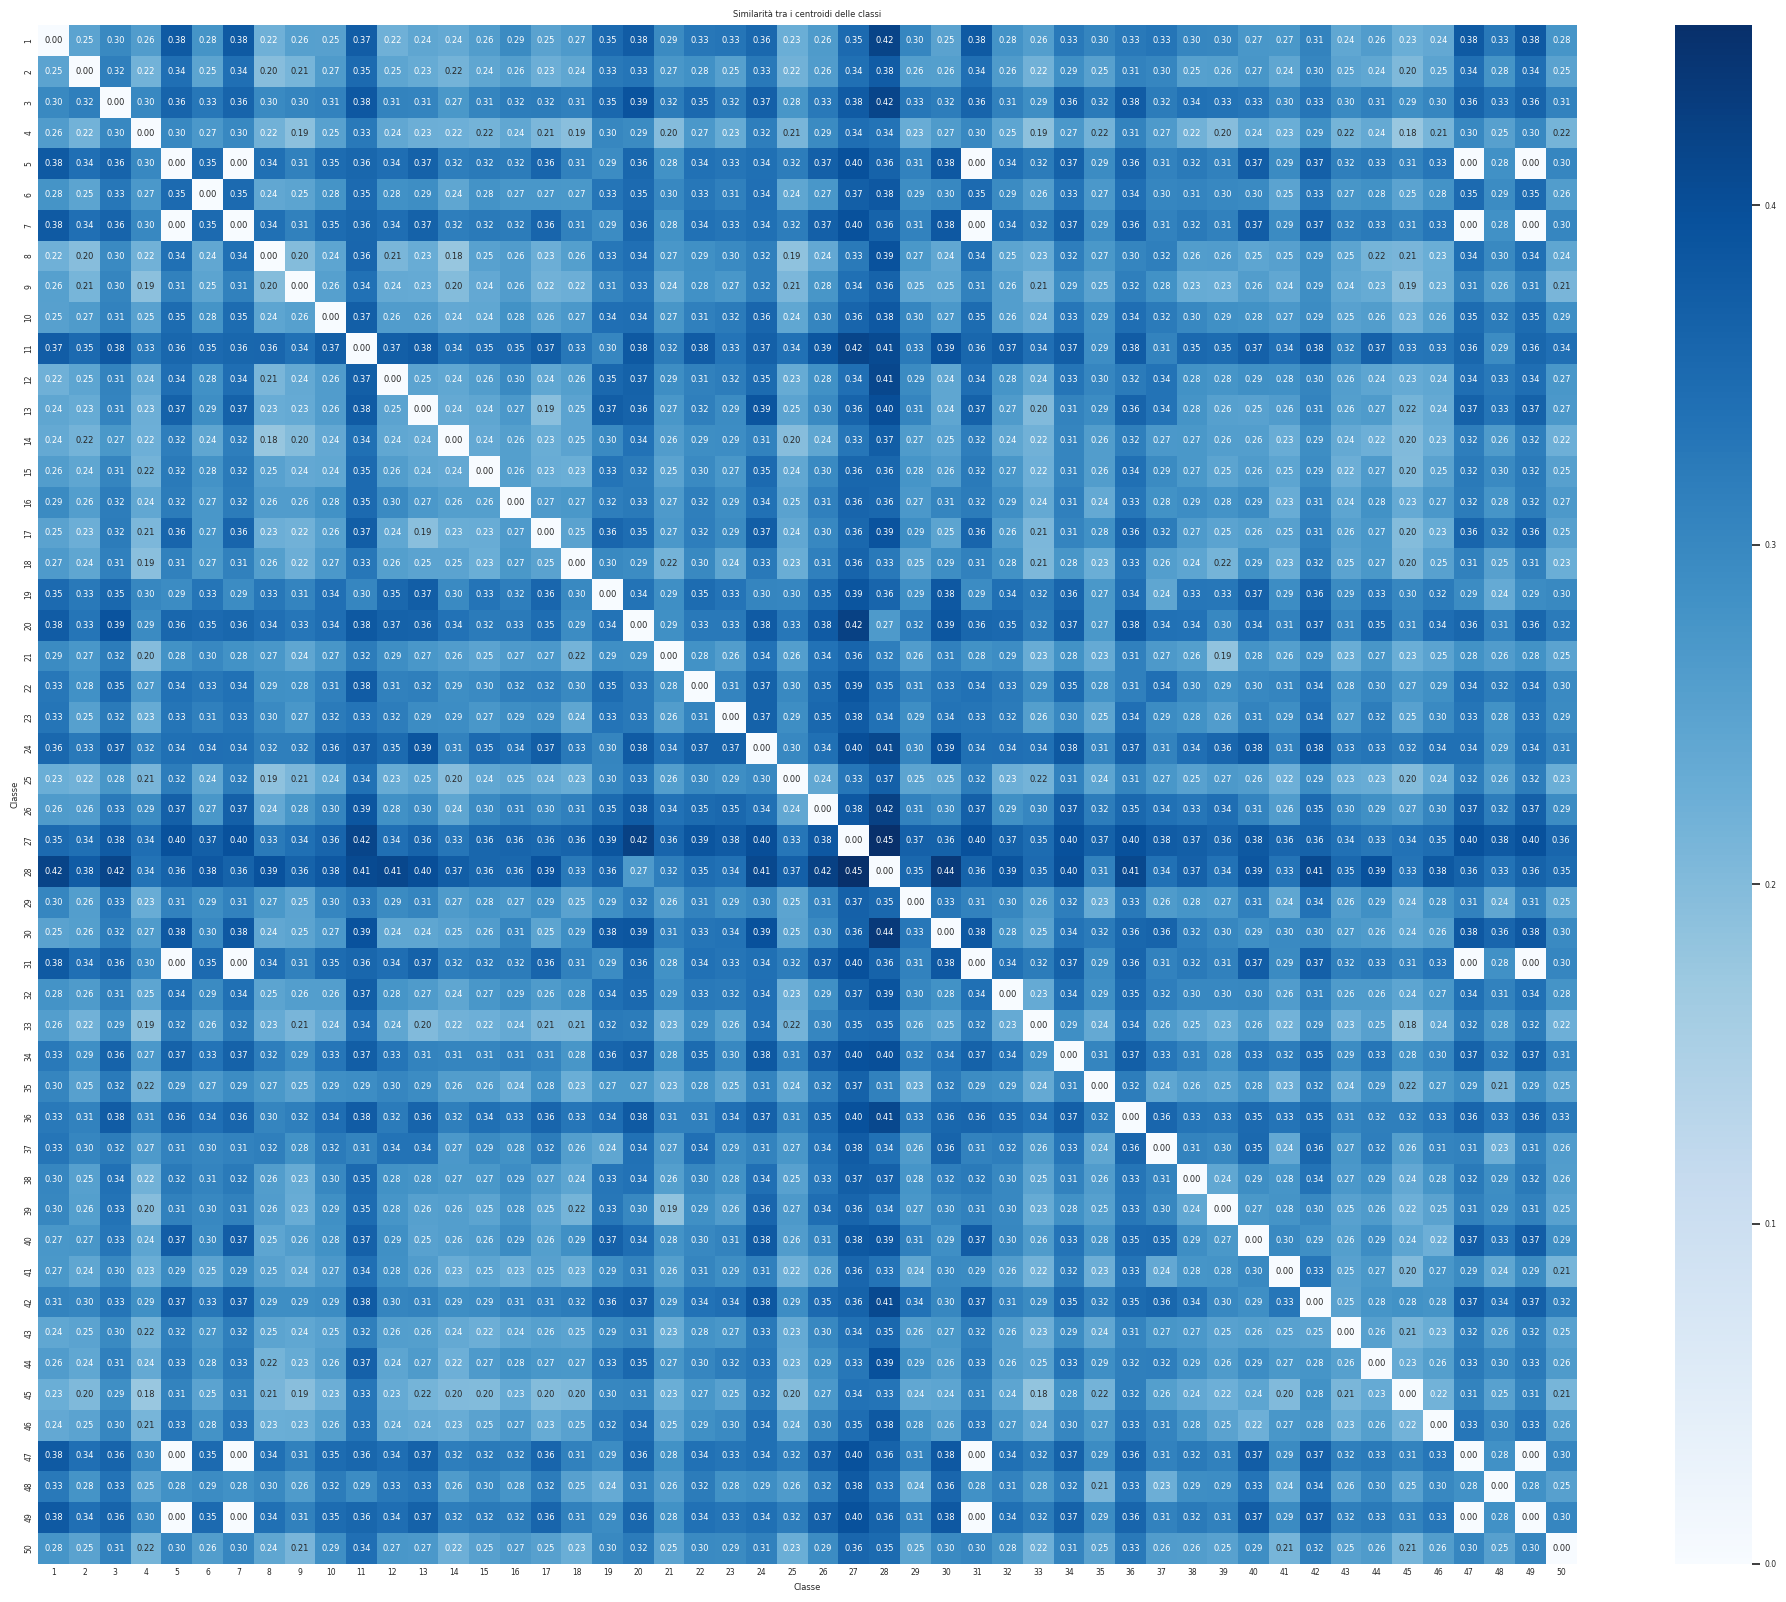

In [ ]:
import seaborn as sns

# Distanza euclidea tra i centroidi
similarities = euclidean_distances(centroidi)

sns.set(font_scale=0.5)
plt.figure(figsize=(20, 16))
sns.heatmap(similarities, cmap=plt.cm.Blues, annot=True, fmt=".2f", cbar=True, square=True)
plt.title('Similarità tra i centroidi delle classi')

new_labels = np.arange(1, len(similarities) + 1)
plt.xticks(np.arange(0.5, len(similarities) + 0.5), new_labels)
plt.yticks(np.arange(0.5, len(similarities) + 0.5), new_labels)

plt.xlabel('Classe')
plt.ylabel('Classe')
plt.tick_params(axis='both', which='both', length=0)
plt.tight_layout()
plt.show()



La _heatmap_ mostra la similarità tra i centroidi delle classi e, ammesso che il centroide sia rappresentativo della classe, testimonia anche la similarità tra classi. Più propriamente, avendo adottato una metrica euclidea, i valori nella heatmap vanno interpretati come una distanza, dunque più sono bassi e più le classi sono simili.

**Nota**: a causa della mancanza di alcuni autori nel dataset, le classi non coprono tutti i valori interi in $(0,50]$. Nella figura vengono mantenuti tutti gli autori per semplicità, tuttavia le righe e le colonne corrispondenti (5, 7, 31, 47 e 49) non hanno alcun significato.

Adottando una metrica differente, i pattern rilevanti sulla matrice delle similarità potrebbero risultare più evidenti. In particolare, la distanza del coseno valuta la similarità (e non la distanza) attraverso l'angolo $\alpha$ formato da due vettori $\textbf{x}$ e $\textbf{y}$:

$$cos(\alpha) = \frac{\textbf{x}\cdot\textbf{y}}{\left\| x\right\|\left\| y\right\|}$$

Adottando questa metrica, la similarità per le classi assenti dal dataset viene nulla, quindi risulta più evidente quali righe e colonne non considerare.

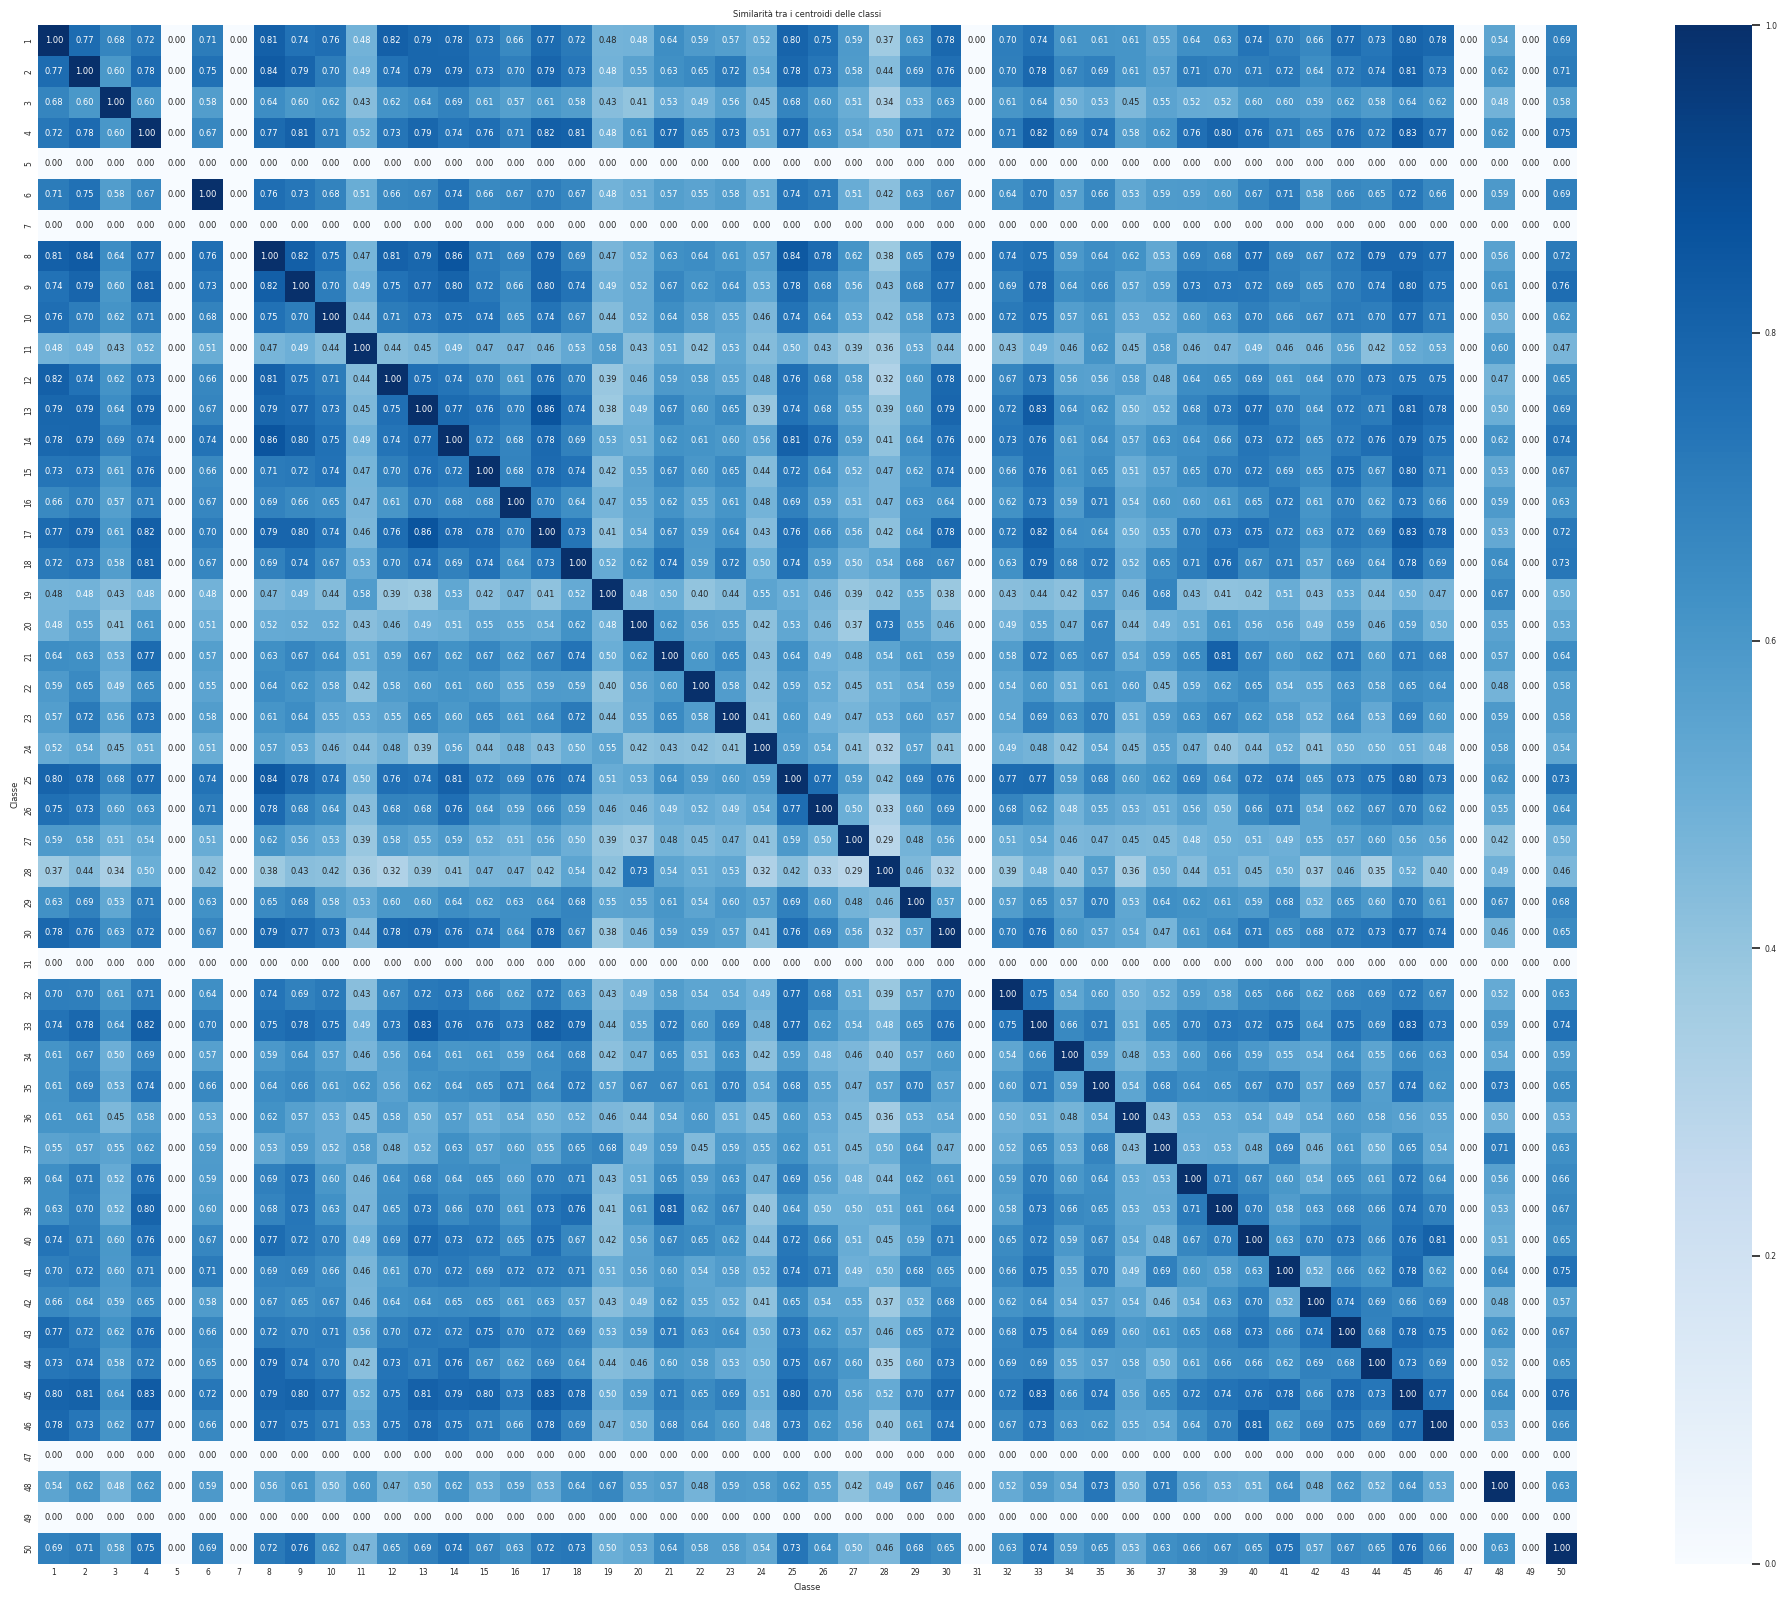

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Distanza del coseno tra i centroidi
similarities_cos = cosine_similarity(centroidi)

sns.set(font_scale=0.5)
plt.figure(figsize=(20, 16))
sns.heatmap(similarities_cos, cmap=plt.cm.Blues, annot=True, fmt=".2f", cbar=True, square=True)
plt.title('Similarità tra i centroidi delle classi')

new_labels = np.arange(1, len(similarities_cos) + 1)
plt.xticks(np.arange(0.5, len(similarities_cos) + 0.5), new_labels)
plt.yticks(np.arange(0.5, len(similarities_cos) + 0.5), new_labels)

plt.xlabel('Classe')
plt.ylabel('Classe')
plt.tick_params(axis='both', which='both', length=0)
plt.tight_layout()

plt.show()

I casi in cui le similarità tra classi superano la soglia di 0.8 sono 1.2% del totale --> MOLTO SIMILI
I casi in cui le similarità tra classi si mantengono tra 0.5 e 0.8 sono 40.6% del totale --> SIMILI
I casi in cui le similarità tra classi si mantengono inferiori a 0.5 sono 58.2% del totale --> POCO SIMILI


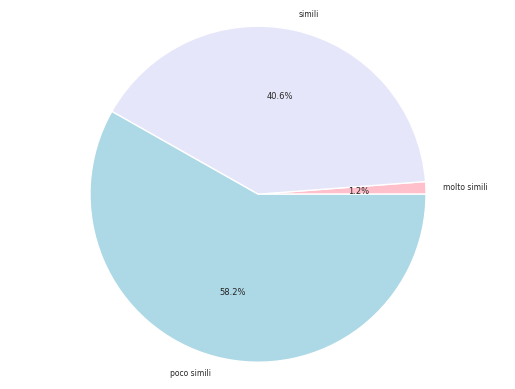

In [ ]:
count=0

for i in range(len(centroidi)):
  for j in range(i,len(centroidi)):
    if similarities_cos[i,j] > 0.8 and i!=j:
      count += 1

tot    = 45 * (45-1)
perc   = round((count/tot)*100, 1)
count1 = 0

for i in range(len(centroidi)):
  for j in range(i,len(centroidi)):
    if similarities_cos[i,j] > 0.5 and similarities_cos[i,j]<= 0.8 and i!=j:
      count1 += 1

perc1 = round((count1/tot)*100,1)
perc2 = 100 - perc - perc1

print("I casi in cui le similarità tra classi superano la soglia di 0.8 sono {}% del totale --> MOLTO SIMILI".format(perc))
print("I casi in cui le similarità tra classi si mantengono tra 0.5 e 0.8 sono {}% del totale --> SIMILI".format(perc1))
print("I casi in cui le similarità tra classi si mantengono inferiori a 0.5 sono {}% del totale --> POCO SIMILI".format(round(perc2,1)))


labels = ['molto simili', 'simili', 'poco simili']
sizes  = [perc, perc1, perc2]
colors = ['pink', 'lavender', 'lightblue']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

In realtà, data una certa classe, non è importante il valore assoluto di similarità con le altre classi (i.e. l'elemento ij della matrice). Infatti, l'intensità del colore nella heatmap testimonia come ci siano classi con elevati valori di similarità con quasi tutte le altre classi.

Sia $M$ la matrice quadrata e simmetrica contenente le similarità tra le classi. Assumendo di osservare le righe, ciò che è interessante guardare per la riga i-esima sono valori di similarità assunti al variare della colonna in relazione l'uno con l'altro. Se si notano valori per una certa combinazione $m_{i,j}$ con $i \neq j$ molto maggiori rispetto agli altri valori sulla stessa riga i-esima, allora vuol dire che la classe $C_{j}$ è la più simile alla $C_{i}$. Dunque, ci si può aspettare che un classificatore le confonda.

***Esempio***: $m_{39,21}=0.81$ emerge con chiarezza che questo valore è decisamente più elevato di tutte le altre $m_{39,j}$, eccetto chiaramente $m_{39,39}=1$. Infatti, tutti i classificatori studiati commettono questo tipo di errore classificando come 39 molte istanze della classe 21.

Questa considerazione potrebbe spiegare il motivo per cui spesso istanze della classe 19 vengono erroneamente assegnate alla 37. Infatti, fissando la riga 19, si osserva che il valore più alto di similarità si ottiene proprio con la classe 37. Non vale il discorso inverso (la 37 è più simile alla 48) ma è giusto che sia così in quanto è la classe 19 ad essere confusa con la 37 e non viceversa.

Secondo questo ragionamento, però, dovrebbero osservarsi situazioni più estreme rispetto alla coppia (19, 37), come ad esempio (28, 20) ma questo non accade. Il motivo per cui si osserva maggiormente questo tipo di errore nei modelli potrebbe avere una concausa proprio nello sbilanciamento dell classi: la classe 37 è circa il doppio della 19 in termini di numerosità, quindi i modelli potrebbero favorire l'assegnazione di 37 a istanze appartenenti alla 19.

Per indagare più a fondo le motivazioni della somiglianza tra le classi 19 e 37, è stata costruita una ***Word Cloud*** con le 50 parole più frequenti nei testi degli autori.


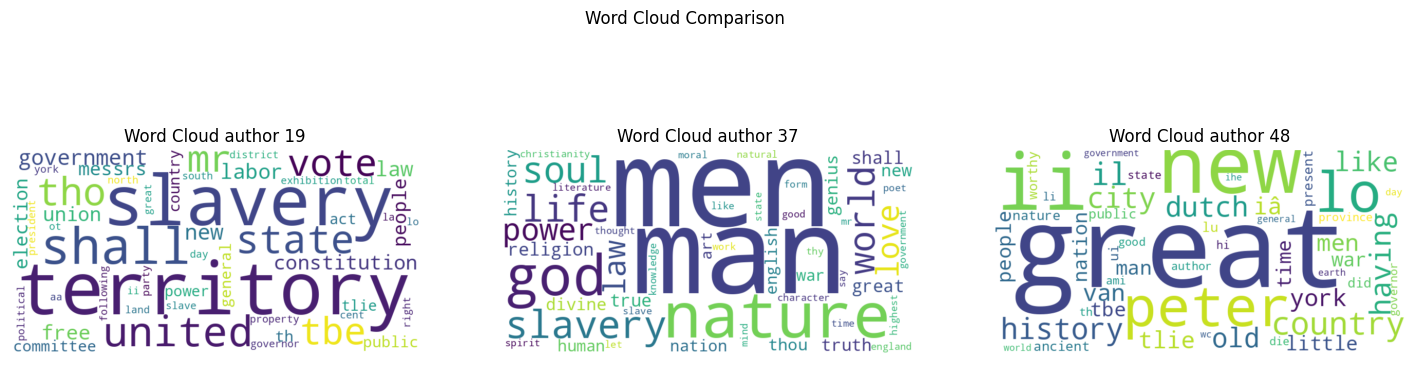


Parole in comune tra 19 e 37:
- slave
- state
- new
- law
- mr
- power
- great
- government
- shall
- slavery

Parole in comune tra 37 e 48:
- nature
- like
- time
- man
- history
- state
- nation
- war
- good
- great
- men
- government
- world
- new


In [ ]:
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter

dizionario = vectorizer.get_feature_names_out()

# Raggruppare i testi di una stessa classe
authors_corpus    = {i: "" for i in range(1,51)}
most_common_words = {}
n_words = 50

for index, row in df.iterrows():
    authors_corpus[row.author] += row.text


# Calcolare le parole più frequenti per ogni autore
for author, corpus in authors_corpus.items():
    if len(corpus) == 0:
        continue

    tfidf = vectorizer.transform([corpus])
    weight_array = tfidf.toarray()
    pos_array = np.argsort(weight_array)[0,-n_words:]

    d = {}
    sum = np.sum(tfidf)
    for i in pos_array:
        freq = weight_array[0][i]
        word = dizionario[i]
        d[word] = freq
    most_common_words[author] = d




# Mostrare la Word Cloud

wordcloud1 = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(most_common_words[19])
wordcloud2 = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(most_common_words[37])
wordcloud3 = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(most_common_words[48])

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
axes[0].imshow(wordcloud1, interpolation='bilinear')
axes[0].set_title("Word Cloud author 19")
axes[0].axis('off')

axes[1].imshow(wordcloud2, interpolation='bilinear')
axes[1].set_title("Word Cloud author 37")
axes[1].axis('off')

axes[2].imshow(wordcloud3, interpolation='bilinear')
axes[2].set_title("Word Cloud author 48")
axes[2].axis('off')

fig.suptitle("Word Cloud Comparison")
plt.show()

intersection_keys = set(most_common_words[19].keys()) & set(most_common_words[37].keys())
print("\nParole in comune tra 19 e 37:")
for key in intersection_keys:
  print("- {}".format(key))

intersection_keys = set(most_common_words[37].keys()) & set(most_common_words[48].keys())
print("\nParole in comune tra 37 e 48:")
for key in intersection_keys:
  print("- {}".format(key))


Gli autori 19 e 37 toccano temi importanti come la schiavitù, il potere e lo Stato sebbene, come si vede dalla *word cloud*, il primo autore sembra parlarne più del primo. L'autore 37, infatti, tratta soprattutto temi più spirituali riguardo l'animo umano e la natura. Si è indotti a pensare che i temi in comune con l'autore 19 siano toccati semplicemente come un aspetto del vivere umano.

Per questo motivo, l'autore 37 è il più simile al 19 ma non viceversa. L'autore che più si avvicina al 37, come già osservato, è il 48 di cui viene riportata la *word cloud*.

# SENTIMENT ANALYSIS <a name="sentiment"></a>
Si vuole, ora, introdurre uno studio del sentimento nei testi degli autori considerati. Inizialmente, si voleva costruire un dataset con feature ricavate dalla sentiment analysis al fine di ricercare potenziali informazioni sul genere letterario tramite algoritmi di clustering. Erano stati ideati due tipi di dataset che, rispettivamente, per ciascun testo consideravano:
* andamento del sentiment (con una serie di campioni dalla curva della *traiettoria narrativa*);
* ranking positivo e negativo del testo complessivo.

Tuttavia, entrambi i dataset risultanti non sono sembrati prestarsi ad ulteriori analisi per due motivi principali:
* i testi considerati sono parti di trattazioni più ampie e, quindi, potrebbero non essere rappresentativi del genere;
* i cluster individuati dall'algoritmo k-means sono troppo deboli (indice di Silhouette $<0.4$).

Si cercherà, dunque, di sfruttare il primo dataset per confermare le ipotesi appena avanzate sugli autori 19 e 37. Il primo processamento del testo da fare è la trasformazione dei dati testuali in array di token.


In [ ]:
def lemmatize_tokenize_text(text, lemmatizer):
    tokens = text.split()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens


tokenized_data      = [lemmatize_tokenize_text(text, lemmatizer) for text in global_corpus]
tokenized_data_test = [lemmatize_tokenize_text(text, lemmatizer) for text in test_corpus]

print("Testo di esempio: {}".format(lemmatized_data[1000]))
print("Tokenizzazione: {}".format(tokenized_data[1000]))
print("Totale token: {}".format(len(tokenized_data[1000])))


Testo di esempio: two young woman drinking the champagne he wa freely offering and tossing off himself and the woman stopped him about diamond ring and rallied him on attention to the a with head up lip compressed eye straight before her and the color mounting in her cheek she passed swiftly up the room between the table and made her way to the magnificent bar behind which mr presided w th one eye ever into the before him walking up to the bar the stranger at once addressed mr are you the proprietor here some folk say so what can i do for yer i have come to ask if there is not a young woman here â she hesitated a moment a the all had their eye on her and a number of youth had by seeking one that wa lost come forward from the table and were beginning to draw about her mr filled in the pause quite a number but not one too many in there is just one and i think you are the very to fill it his teeth gleamed for a second at the murmur of approval which came from the men who had drawn up to t

Per studiare il sentiment si fa uso della classe *SentimentIntensityAnalyzer* appartenente al package _nltk.sentiment_. In particolare, il metodo *polarity_scores* è in grado di calcolare il sentimento complessivo di una frase o di un testo facendo uso del lessico VADER (Valence Aware Dictionary and sEntiment Reasoner).

VADER è un dizionario che associa alle singole parole dei valori di polarità (positiva, negativa o neutra). Attraverso una serie di regole basate sul linguaggio naturale, l'algoritmo è in grado di gestire la sintassi delle frasi (e.g. negazioni invertono il sentimento, punti esclamativi lo rafforzano). Si giunge, così, a un punteggio composto $\in[-1,1]$ che viene memorizzato nella variabile _compound_.
Si mostra l'applicazione dell'algoritmo su tutti i testi degli autori 19 e 37.

La traiettoria narrativa di un testo, rappresenta l'evoluzione del sentiment delle unità testuali che lo compongono. Ciascun testo viene suddiviso in porzioni uguali sulle quali viene calcolato uno scoring di sentimento (*compound*): in questo modo, il singolo testo disporrà di una serie di valori di cui possiamo graficare l'andamento.


Nella figura sottostante, viene mostrata la traiettoria narrativa _media_ dei due autori oggetto di studio. Questa è stata ottenuta calcolando un andamento medio sui documenti propri dell'autore considerato.

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


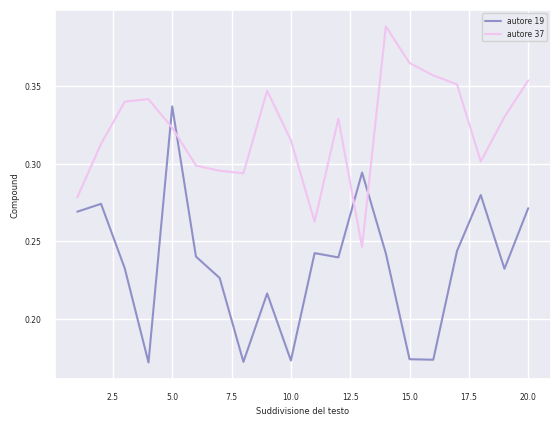

In [ ]:
nltk.download('vader_lexicon')
nltk.download('punkt')
from nltk.sentiment import SentimentIntensityAnalyzer
import seaborn as sns


scores19 = []
scores37 = []
sia      = SentimentIntensityAnalyzer()
all_sentiment_scores = []

for i in range(0, len(global_corpus)):

    text_tokens = tokenized_data[i]
    author =  y_train.iloc[i]

    # Suddivisione del testo in 20 stringhe con 50 token ciascuna
    partitioned_text = [text_tokens[i:i + 50] for i in range(0, len(text_tokens), 50)]
    partitioned_text_strings = [' '.join(tokens) for tokens in partitioned_text]

    sentence_sentiments = [sia.polarity_scores(sentence) for sentence in partitioned_text_strings]
    sentiment_scores = [sentiment['compound'] for sentiment in sentence_sentiments]

    all_sentiment_scores.append(sentiment_scores)
    if author == 19:
      scores19.append(sentiment_scores)
    elif author == 37:
      scores37.append(sentiment_scores)


mean_score19 = np.mean(scores19, axis=0)
mean_score37 = np.mean(scores37, axis=0)

x = [i for i in range(1,len(text_tokens)//50 +1)]
plt.plot(x, mean_score19, label='autore 19', color=sns.light_palette("darkblue")[2])
plt.plot(x, mean_score37, label='autore 37', color=sns.light_palette("violet")[2])
plt.xlabel("Suddivisione del testo")
plt.ylabel("Compound")
plt.legend()
plt.show()

Come già osservato dall'analisi della *word cloud*, l'autore 37 sembra spaziare maggiormente sui temi trattati. Questi risultano meno gravi rispetto ai temi dell'autore 19 (e.g. schiavitù) e aggiungono, di conseguenza, una nota di positività.

\
Di seguito, viene mostrato il tentativo di ottenere un clustering sul primo dataset citato.

In [ ]:
sia = SentimentIntensityAnalyzer()
trend_vectors = [] # nuovo dataset


for sentiment_vector in all_sentiment_scores:

    # il testo è suddiviso in due gruppi di partizioni, il cui compound è la media nel gruppo
    grouped_sentiment = [sentiment_vector[i:i+10] for i in range(0, len(sentiment_vector), 10)]
    trend_vector = [np.mean(group) for group in grouped_sentiment]
    trend_vectors.append(trend_vector)



# Prima il dataset tfidf era un numpy.ndarray, quindi dato che trend_vectors è list la trasformo in array
trend_dataset = np.array(trend_vectors)

print(type(trend_dataset))

print("Il nuovo dataset è: \n {}".format(trend_dataset))
print(trend_dataset.shape)
print("\nNuovo vettore per il primo documento:\n {}".format(trend_dataset[0]))

<class 'numpy.ndarray'>
Il nuovo dataset è: 
 [[-0.1385   0.13833]
 [ 0.24799  0.12245]
 [ 0.42281  0.18779]
 ...
 [ 0.30475  0.53847]
 [ 0.47587 -0.19407]
 [ 0.6896   0.48307]]
(3773, 2)

Nuovo vettore per il primo documento:
 [-0.1385   0.13833]


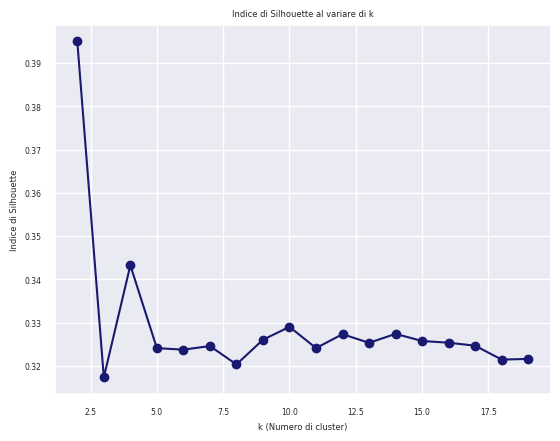

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


k_values = range(2, 20)
silhouette_scores = []


for k in k_values:

    kmeans = KMeans(n_clusters=k)
    kmeans.fit(trend_dataset)
    labels = kmeans.labels_.astype(int)

    # Calcolo del coefficiente di Silhouette
    silhouette = silhouette_score(trend_dataset, labels)
    silhouette_scores.append(silhouette)

plt.plot(k_values, silhouette_scores, marker='o', color='midnightblue')
plt.title("Indice di Silhouette al variare di k")
plt.xlabel("k (Numero di cluster)")
plt.ylabel("Indice di Silhouette")
plt.show()


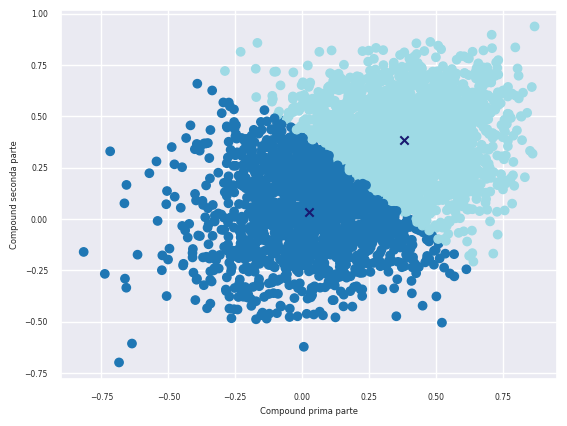

Coefficiente di Silhouette: 0.39500713871072973


In [ ]:
num_clusters = 2

kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(trend_dataset)
labels = kmeans.labels_.astype(int)
centroids = kmeans.cluster_centers_


plt.scatter(trend_dataset[:, 0], trend_dataset[:, 1], c=labels, cmap='tab20')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='midnightblue')

# plt.title("Cluster")
plt.xlabel("Compound prima parte")
plt.ylabel("Compound seconda parte")
plt.show()

silhouette = silhouette_score(trend_dataset, labels)
print("Coefficiente di Silhouette:", silhouette)


Chiaramente, i cluster ottenuti sono troppo deboli e non è possibile interpretarli in modo significativo.


# WORD EMBEDDING <a name="embedding"></a>

Come già sottolineato, la rappresentazione dell'input adottata è la *tfidf*, appartenente alla famiglia delle *bag of words*. Tali rappresentazioni sono povere in quanto:
* non catturano il significato e il contesto delle parole;
* non catturano relazioni semantiche tra parole.

Infatti, si sta tentando di descrivere un testo solamente mediante l'occorrenza delle parole che contiene, perdendo qualsiasi altra informazione. Una parola, dunque, contribuisce solo in quanto occorre nel testo, niente di più.

Per ottenere una rappresentazione più intelligente, nasce il **word space**, uno spazio vettoriale in cui ogni parola si trova in relazione biunivoca con un punto dello spazio. Tale spazio viene costruito ad hoc per catturare informazioni rilevanti dalle parole. La rappresentazione così costruita per le parole viene detta *embedding*.

È possibile ottenere l'embedding delle parole attraverso le reti neurali. Uno dei modelli utilizzati per produrre il *word embedding* è **Word2vec** che sfrutta le reti neurali *CBOW* e/o *Skip-gram*. Tuttavia, ciò che viene prodotto rimane l'embedding delle singole parole e non dei testi. Al fine di arrivare a una rappresentazione vettoriale anche per i testi, possono essere adottate diverse tecniche, dalla semplice media delle rappresentazioni delle singole parole all'utilizzo di reti neurali apposite.


Per cercare di incrementare le performance dei modelli presentati in questo progetto, si è cercato di giungere a una rappresentazione di questo tipo per i testi del dataset analizzato. Dunque, si è scelto di utilizzare il Word2vec. Al fine di ottenere un embedding dei testi, sono stati percorsi i seguenti step:


1.   è stato caricato il modello Word2Vec pre-trained "word2vec-google-news-300", che include vettori di parole sul word space di dimensione 300, addestrati su un corpus di testi molto ampio e diversificato;

2. per ciascun testo, sono stati ricavati gli embedding delle singole parole;

3. per ottenere l'embedding del testo è stata effettuata una media sui vettori delle parole di cui il testo si compone;

4. per stabilizzare i modelli, i vettori ottenuti sono stati scalati, moltiplicandoli per una costante.




In [ ]:
import gensim.downloader as api
import numpy as np

model = api.load("word2vec-google-news-300")


[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [ ]:
#EMBEDDING PER IL TRAINING SET
sentences_embedding = [np.zeros(model.vector_size) for _ in range(len(tokenized_data))]
num_words = np.zeros(len(tokenized_data))
num_doc = 0


for frase in tokenized_data:
    for word in frase:
        if word in model:
            sentences_embedding[num_doc] += model[word]
            num_words[num_doc] += 1
    num_doc += 1


num_doc = 0
for frase in tokenized_data:
  if num_words[num_doc] > 0:
      sentences_embedding[num_doc] /= num_words[num_doc]
      sentences_embedding[num_doc] *= 867
  num_doc += 1

print("Embedding del primo testo:")
print(sentences_embedding[0])
print(len(sentences_embedding))

Embedding del primo testo:
[  39.51799125   39.30354126   36.50612581   65.99294344  -40.33802089
  -29.59531788   31.99657734  -71.56720424   49.77114855   55.58462825
  -32.79008384  -96.19273602  -21.89094651   12.80369348  -99.24395548
   39.90334892   49.00364374   70.81618341   26.59981556  -34.64493747
  -27.66931812   36.11176068   21.26850796  -15.8132856    39.5965929
  -21.48926304  -68.44218363   29.10617834   35.29593708    4.41047005
  -11.0911909    14.71662158  -38.53463545  -12.72092593   -3.19550508
   -3.81070345   14.24496505  -16.11340267   21.99436536   37.80685771
   68.13253322  -43.28805937  108.46558796  -28.62574391  -11.80433944
    8.00774632  -34.15035993    7.4081701    27.37582227   24.29636721
   16.17116264   40.14482225    0.61681752    1.91107285   -2.73922153
   35.399816    -34.20353976  -39.86481532   33.5524554   -62.45106142
  -26.185933     61.5189545   -47.57386762  -66.34368786  -15.23637643
   -9.21054206  -18.35972843   76.20655704  -37.392

In [ ]:
# EMBEDDING PER IL TEST SET
sentences_embedding_test = [np.zeros(model.vector_size) for _ in range(len(tokenized_data_test))]
num_words_test = np.zeros(len(tokenized_data_test))
num_doc_test = 0


for frase in tokenized_data_test:
    for word in frase:
        if word in model:
            sentences_embedding_test[num_doc_test] += model[word]
            num_words_test[num_doc_test] += 1
    num_doc_test += 1



num_doc_test = 0
for frase in tokenized_data_test:
  if num_words[num_doc_test] > 0:
      sentences_embedding_test[num_doc_test] /= num_words_test[num_doc_test]
      sentences_embedding_test[num_doc_test] *= 867
  num_doc += 1

In ```sentence_embedding``` e ```sentence_embedding_test``` si trovano le nuove rappresentazioni vettoriali per i testi rispettivamente del training set e del test set. Tali vettori saranno dati in input al miglior modello emerso dalla precedente analisi (SVM), al fine di confrontare le prestazioni ottenute.

In particolare, si confronteranno gli indicatori di performance tra i migliori modelli prodotti in base all'input ricevuto. Dunque, non si terranno fissi gli iperparametri individuati in precedenza, ma si procederà con una nuova cross validation per trovare il miglior modello in grado di gestire il nuovo input.

Il miglior valore di C tra quelli analizzati è 1


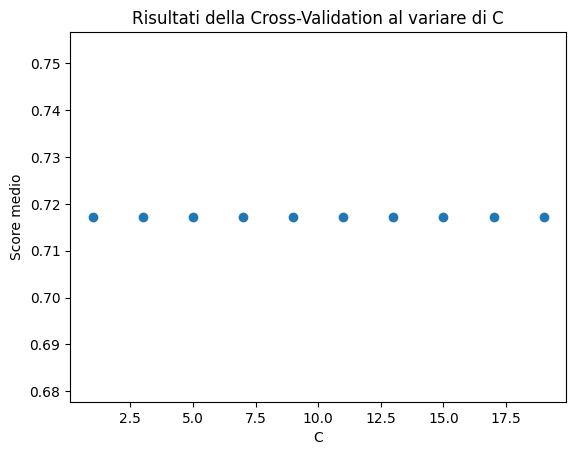

In [ ]:
# CROSS VALIDATION PER C

decision_function_shape = 'ovr'
max_iter = 100
kernel   = 'linear'

mean_score_c  = []
c_values     = np.arange(1, 21, 2)
iterations_c = len(c_values)
j = 1



for c in c_values:

    print_progress(j, iterations_c)

    svm_model = svm.SVC(C=c, max_iter=max_iter, kernel=kernel, decision_function_shape=decision_function_shape)#, gamma=best_gamma)
    scores    = cross_val_score(svm_model, sentences_embedding, y_train, cv=10,scoring='f1_micro')
    mean_score_c.append(np.mean(scores))
    j += 1

best_c = c_values[np.argmax(mean_score_c)]
print("Il miglior valore di C tra quelli analizzati è {}".format(c_values[np.argmax(mean_score_c)]))


plt.show()

plt.scatter(c_values, mean_score_c)
plt.xlabel('C')
plt.ylabel('Score medio')
plt.title('Risultati della Cross-Validation al variare di C')
plt.show()



Report classificazione training set:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        61
           2       1.00      1.00      1.00        28
           3       1.00      1.00      1.00        15
           4       0.95      0.99      0.97       106
           6       0.96      1.00      0.98        23
           8       0.98      0.97      0.97       490
           9       0.99      0.99      0.99        83
          10       1.00      1.00      1.00        52
          11       0.97      1.00      0.99        33
          12       1.00      1.00      1.00        39
          13       1.00      1.00      1.00        30
          14       0.98      0.99      0.99       199
          15       1.00      1.00      1.00       104
          16       1.00      1.00      1.00        14
          17       0.98      1.00      0.99        48
          18       1.00      1.00      1.00        74
          19       0.95      0.99      0.97

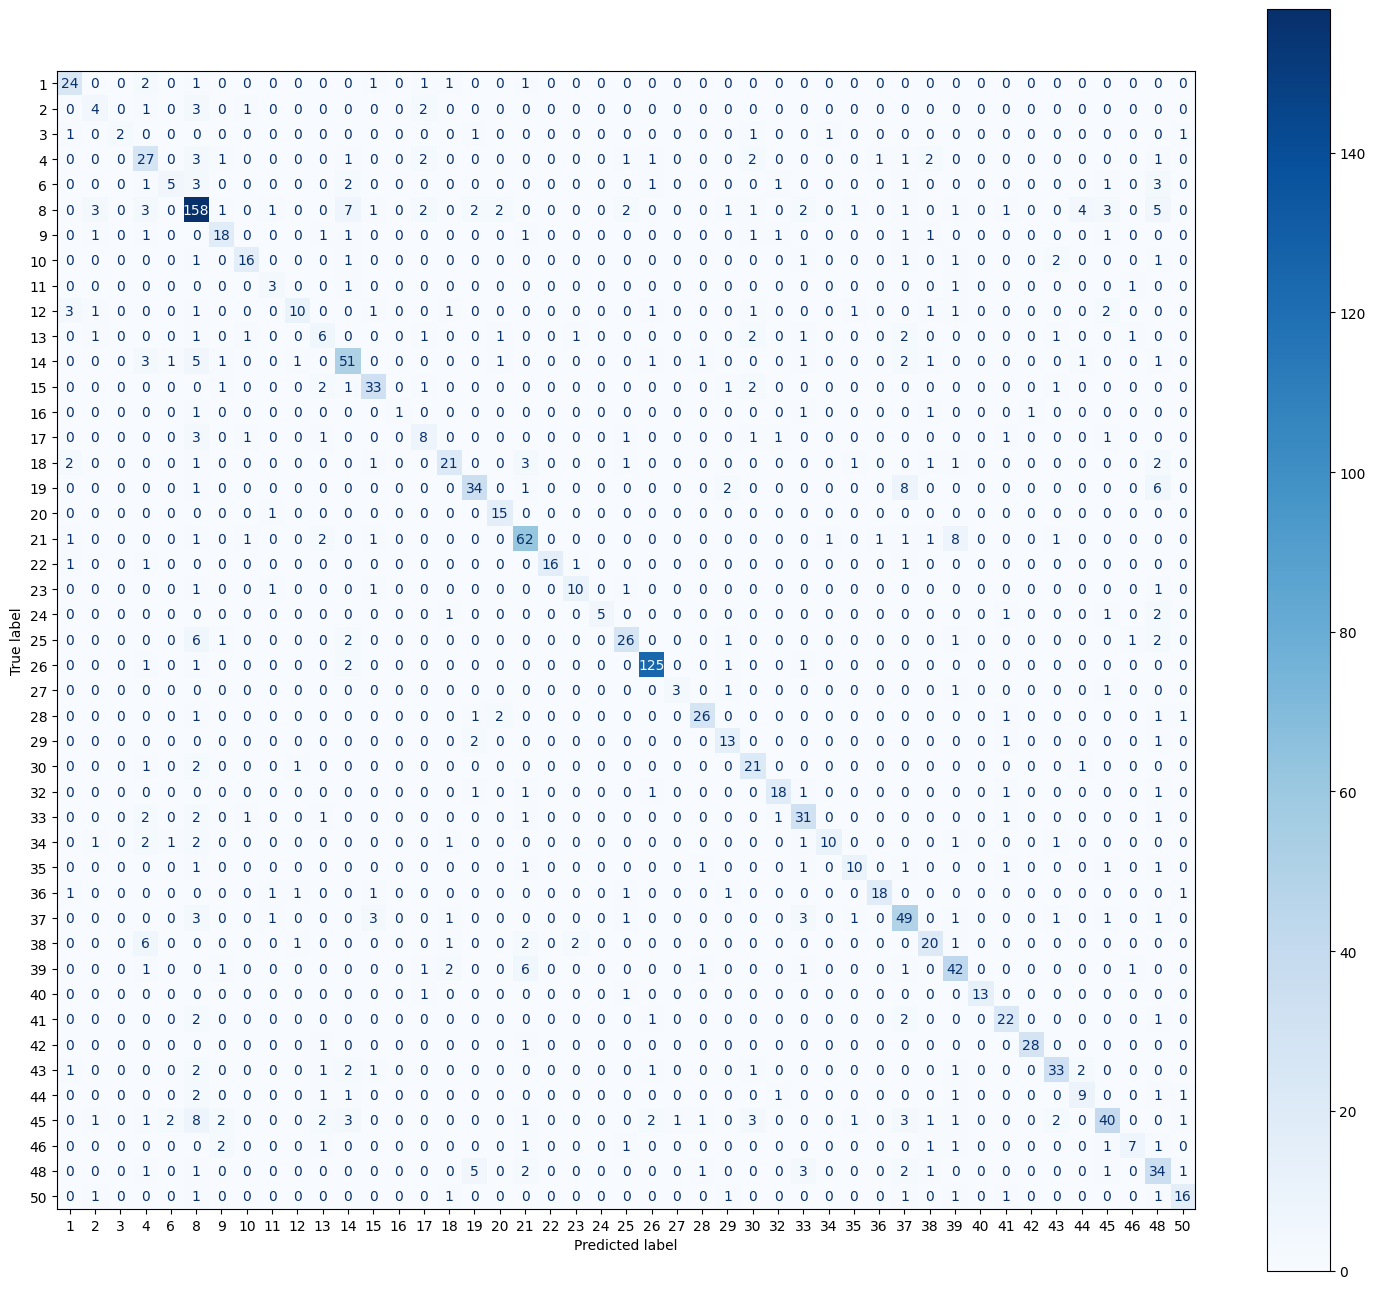

In [ ]:
# ADDESTRAMENTO DEL MODELLO FINALE E MATRICE DI CONFUSIONE
import matplotlib.cm as cm

decision_function_shape = 'ovr'
max_iter = 100
kernel = 'linear'


svm_model = svm.SVC(C=10, max_iter=max_iter, kernel=kernel, decision_function_shape=decision_function_shape)#, gamma=1)
svm_model.fit(sentences_embedding, y_train)
score     = svm_model.score(sentences_embedding, y_train)
score_t   = svm_model.score(sentences_embedding_test, y_test)

predicted   = svm_model.predict(sentences_embedding)
predicted_t = svm_model.predict(sentences_embedding_test)
cm_train    = confusion_matrix(y_train, predicted, labels=svm_model.classes_)
report_tr   = classification_report(y_train, predicted, labels=svm_model.classes_)
cm_test     = confusion_matrix(y_test, predicted_t, labels=svm_model.classes_)
report_te   = classification_report(y_test, predicted_t, labels=svm_model.classes_)
print("Report classificazione training set:\n {}\n".format(report_tr))
print("Report classificazione test set:\n {}\n".format(report_te))


fig, ax2 = plt.subplots(1, 1, figsize=(15, 13))
disp_t   = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=svm_model.classes_)
disp_t.plot(ax=ax2, cmap=plt.cm.Blues)

ax2.grid(False)
plt.tight_layout()
plt.show()

Il risultato di questa analisi suggerisce che il modello *tfidf* è una rappresentazione migliore dell'input rispetto all'embedding fornito dal *Word2vec*, nei limiti del task considerato. Sembra un risultato controintuitivo: un input più povero garantisce prestazioni migliori di un input più espressivo. Tuttavia, potrebbe confermare un risultato ottenuto in uno studio simile:
<blockquote>
  <p>Denis Eka Cahyani, Irene Patasik. "Performance comparison of TF-IDF and Word2Vec models for emotion text classification". <em>Bulletin of Electrical Engineering and Informatics (BEEI)</em>, 2021. Disponibile su: <a href="URL">https://www.beei.org/index.php/EEI/article/view/3157</a>.</p>
</blockquote>

In questo articolo, gli autori confrontano le prestazioni di alcuni modelli (tra cui SVM) nel task del riconoscimento delle emozioni al variare della rappresentazione dell'input. In particolare, confrontano *tfidf* e *Word2vec* e arrivano a mostrare come il primo sia migliore del secondo in termini di prestazioni.

# BILANCIAMENTO DEL DATASET <a name="bila"></a>

In questo paragrafo verrà investigata l'influenza dello sbilanciamento sui modelli studiati precedentemente. Per ottenere un dataset più bilanciato, si è scelto di partire dal dataset completo $D$ con oltre 50.000 istanze e applicare la tecnica dell'***undersampling***.
* Per prima cosa, viene estratto un training set bilanciato $T$ in cui, quindi, ogni classe compare con la stessa cardinalità.
* Successivamente, viene campionato il test set dalle istanze rimanenti ($D-T$). Si parla, dunque, di estrazione senza reimbussolamento.

Ogni classe del dataset deve avere 182 elementi


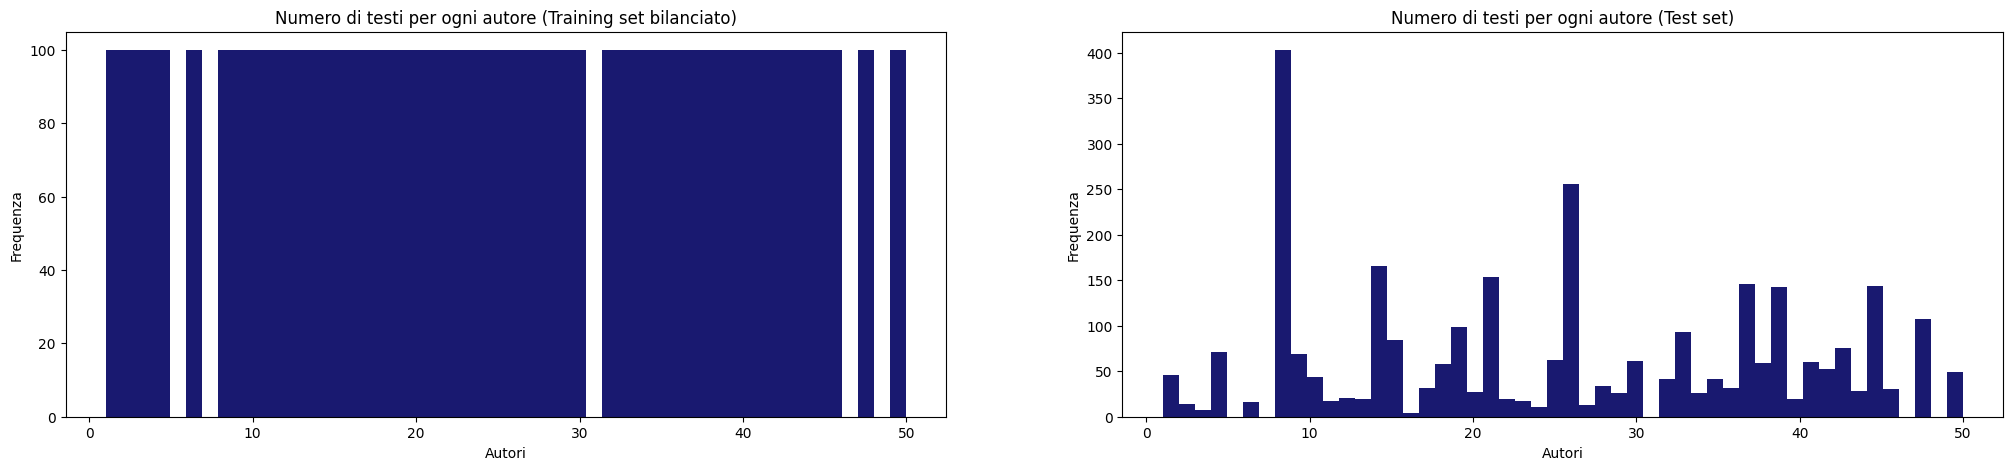

In [ ]:
from sklearn.model_selection import train_test_split

df           = pd.read_csv(file, delimiter=',',  encoding='latin-1')
class_counts = df.author.value_counts()
dim          = class_counts.min() -1
print("Ogni classe del dataset deve avere {} elementi".format(dim))


# Bilanciamento del training set
balanced_train = pd.DataFrame()
res_df         = pd.DataFrame()

for author in classes:
    df_author = df.loc[df.author == author]
    undersample, res  = train_test_split(df_author, train_size=100, random_state=42)
    balanced_train    = pd.concat([balanced_train, undersample])
    res_df            =  pd.concat([res_df, res])

# Estrazione del  test set
num_in_test = int(len(balanced_train)*(0.4/0.6))
_, dft = train_test_split(res_df, test_size=num_in_test, random_state=20)
df = balanced_train


# ISTOGRAMMI
fig, axes = plt.subplots(1, 2, figsize=(25, 5))
axes[0].hist(df.author.to_numpy(), bins=50, color='midnightblue')
axes[0].set(xlabel='Autori', ylabel='Frequenza', title='Numero di testi per ogni autore (Training set bilanciato)')

axes[1].hist(dft.author.to_numpy(), bins=50, color='midnightblue')
axes[1].set(xlabel='Autori', ylabel='Frequenza', title='Numero di testi per ogni autore (Test set)')

plt.show()


global_corpus = df.text.to_numpy()
test_corpus   = dft.text.to_numpy()

In [ ]:
# Trasformazione corpus in matrice termini x documenti
lemmatized_data      = [lemmatize_text(text, lemmatizer) for text in global_corpus]
lemmatized_data_test = [lemmatize_text(text, lemmatizer) for text in test_corpus]

X_train = vectorizer.fit_transform(lemmatized_data)
y_train = df.author
X_test  = vectorizer.transform(lemmatized_data_test)
y_test  = dft.author

# Decomposizione SVD con k=300 dimensioni
k = 300
svd_def = TruncatedSVD(n_components=k, n_iter=7, random_state=42)
svd_def.fit(X_train)
X_train = svd_def.transform(X_train)
X_test = svd_def.transform(X_test)

Si procede, ora all'addestramento dei modelli considerati finora per analizzarne le prestazioni.

In [ ]:
# Addestramento RANDOM FOREST con dataset bilanciato
n_estimators = 100
criterion    = 'entropy'
max_depth = 12
rf = RandomForestClassifier(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth, random_state=2)
rf = rf.fit(X_train, y_train)


# Addestramento SVM con dataset bilanciato
decision_function_shape = 'ovr'
max_iter = 100
c        = 8
kernel   = 'rbf'
gamma    = 1
svm_model = svm.SVC(C=c, max_iter=max_iter, kernel=kernel, decision_function_shape=decision_function_shape, gamma=gamma)
svm_model.fit(X_train, y_train)


# Addestramento SOFTMAX con dataset bilanciato
C_s = 34
softmax = LogisticRegression(C=C_s)
softmax.fit(X_train, y_train)

# Addestramento MULTILAYER PERCEPTRON con dataset bilanciato
eta  = 0.5
size = (1000)
mlp  = MLPClassifier(hidden_layer_sizes=size, solver='sgd', activation="relu", learning_rate='adaptive', learning_rate_init=eta, random_state=1, early_stopping=True, n_iter_no_change=10)
mlp.fit(X_train, y_train)

MLPClassifier(early_stopping=True, hidden_layer_sizes=1000,
              learning_rate='adaptive', learning_rate_init=0.5, random_state=1,
              solver='sgd')

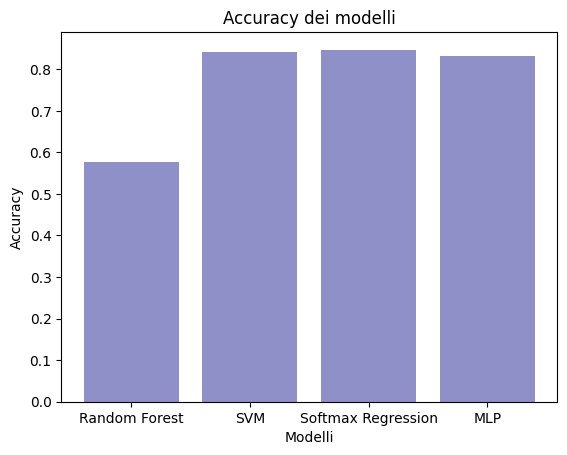

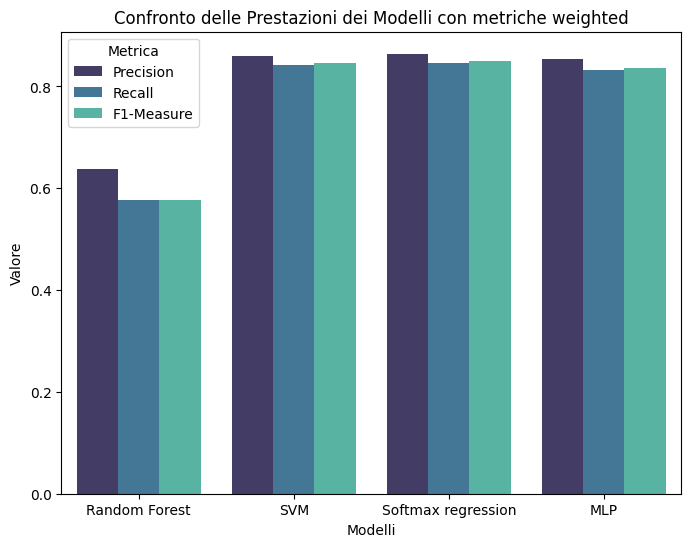

In [ ]:
import seaborn as sns

predicted_b_t_rf = rf.predict(X_test)
report_b_te_rf   = classification_report(y_test, predicted_b_t_rf, labels=rf.classes_, output_dict=True)

predicted_b_t    = svm_model.predict(X_test)
report_b_te      = classification_report(y_test, predicted_b_t, labels=svm_model.classes_, output_dict=True)

predicted_b_t_s  = softmax.predict(X_test)
report_b_te_s    = classification_report(y_test, predicted_b_t_s, labels=softmax.classes_, output_dict=True)

predicted_b_t_m  = mlp.predict(X_test)
report_b_te_m    = classification_report(y_test, predicted_b_t_m, labels=mlp.classes_, output_dict=True)



# ACCURACY

accuracy_model1 = accuracy_score(y_test, predicted_b_t_rf)
accuracy_model2 = accuracy_score(y_test, predicted_b_t)
accuracy_model3 = accuracy_score(y_test, predicted_b_t_s)
accuracy_model4 = accuracy_score(y_test, predicted_b_t_m)
accuracies = [accuracy_model1, accuracy_model2, accuracy_model3, accuracy_model4]

# Nomi dei modelli
model_names = ['Random Forest', 'SVM', 'Softmax Regression', 'MLP']

# Creazione del grafico a barre
plt.bar(model_names, accuracies, color=sns.light_palette("darkblue")[2])

# Etichette degli assi e del titolo
plt.xlabel('Modelli')
plt.ylabel('Accuracy')
plt.title('Accuracy dei modelli')

# Mostra il grafico
plt.show()


# Dati delle prestazioni dei modelli
models = ['Random Forest', 'SVM', 'Softmax regression', 'MLP']
keys = ['Model', 'Precision', 'Recall', 'F1-Measure']
prestations = [report_b_te_rf, report_b_te, report_b_te_s, report_b_te_m]
data = {k: [] for k in keys}


for i in range(0, len(models)):
    data['Model'].append(models[i])
    data['Precision'].append(prestations[i]['weighted avg']['precision'])
    data['Recall'].append(prestations[i]['weighted avg']['recall'])
    data['F1-Measure'].append(prestations[i]['weighted avg']['f1-score'])
plot_df = pd.DataFrame(data)

colors = sns.color_palette("mako", 3)
plot_df = plot_df.melt('Model', var_name='Metrica', value_name='Valore')
plt.figure(figsize=(8, 6))
sns.barplot(x='Model', y='Valore', hue='Metrica', data=plot_df, palette=colors)
plt.xlabel('Modelli')
plt.ylabel('Valore')
plt.title('Confronto delle Prestazioni dei Modelli con metriche weighted')

plt.show()

In [ ]:
print(accuracies)

[0.576, 0.842, 0.847, 0.8316666666666667]


Dalle prestazioni dei 4 modelli sul training set bilanciato, la softmax risulta essere migliore degli altri, almeno per quanto riguarda l'accuracy ($= 84,7\%$). Questo risultato si discosta dal precedente che vedeva la SVM superare in performance gli altri modelli.

Le metriche non possono confrontarsi al 100% con quelle ottenute in precedenza in quanto i classificatori sono stati addestrati su dataset diversi. Però possono essere fatte due osservazioni interessanti.
1. Campionando dal dataset iniziale due training set estremamente diversi in forma e istanze (i.e. training set sbilanciato e training set bilanciato), le metriche non sembrano cambiare notevolmente. Si può notare un miglioramento ma non è così importante come ci si poteva aspettare. Precedentemente, si era ipotizzato che il problema delle classificazioni errate potesse essere attribuito allo sbilanciamento delle classi ma evidentemente non è così. I risultati ottenuti sembrano condurre verso l'idea che i modelli sviluppati abbiano una bassa varianza.
2. Provando ad allenare i modelli costruiti (con gli iperparametri stabiliti in precedenza) su un training set di $\sim 25.000$ istanze, si può notare un notevole incremento delle prestazioni dei modelli che raggiungono accuracy oltre il 90%. Dunque, il problema di fondo delle classificazioni errate era la dimensione ridotta del dataset.




Nella seguente immagine viene riportata la matrice di confusione per la SVM definita sugli stessi parametri fissati in precedenza ma allenata su un training set di $36.836$ testi. L'accuracy supera il $94\%$.

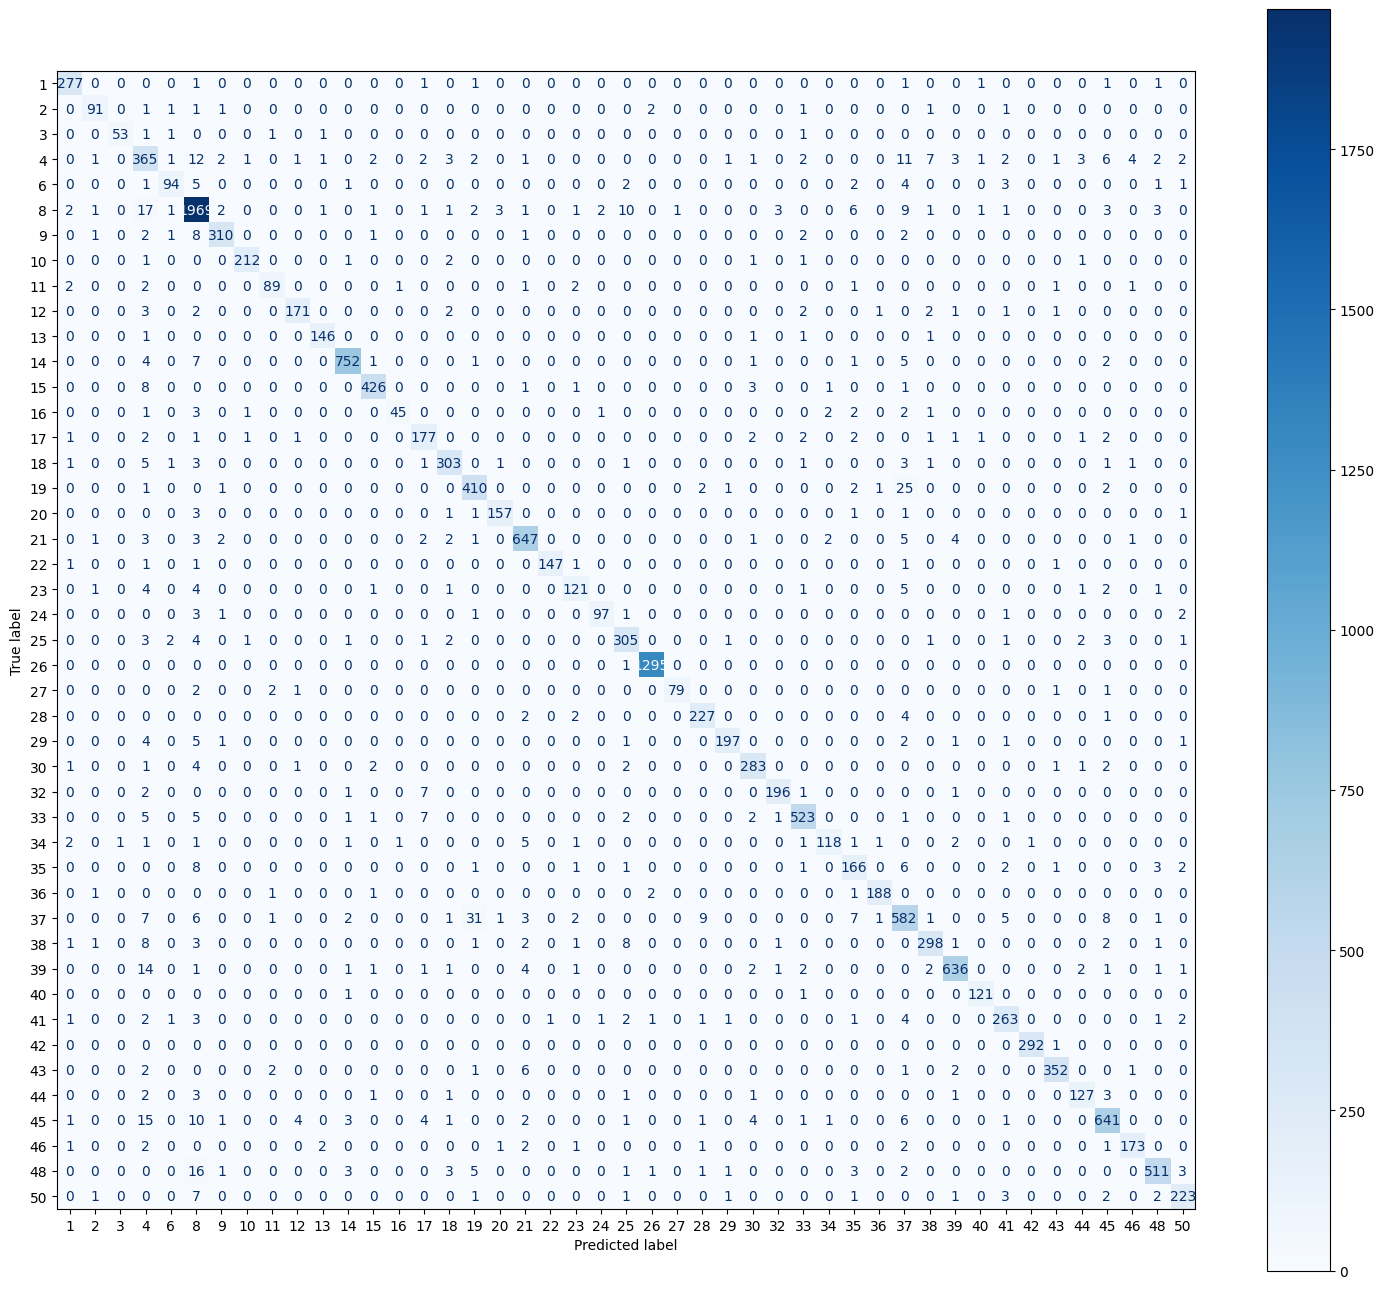

# CONCLUSIONI <a name="conc"></a>

Nel presente studio è stato analizzato il task di *authorship attribution* su un dataset di testi letterari in lingua inglese. Sono stati studiati i comportamenti di vari modelli, cercando di analizzare in modo critico i risultati forniti e indagando circa le motivazioni dietro eventuali errori ricorrenti.

I risultati hanno portato a concludere che il modello *SVM soft margin* basato su un kernel gaussiano fosse il migliore, in quanto ha mostrato prestazioni più elevate in risposta a un dataset sbilanciato composto da dati testuali. Le sue performance in termini assoluti potrebbero essere aumentate ancora fornendo al modello una migliore rappresentazione dell'input:

* in primis, si potrebbe variare la dimensionalità dello spazio, che in questo studio è stata fissata pari a $k=300$. Un numero diverso di feature considerate a seguito della Truncated SVD potrebbe migliorare ulteriormente i modelli;

* in secondo luogo, la rappresentazione vettoriale scelta appartiene alla categoria delle *bag of words*. Nel progetto è stato mostrato come risultasse migliore dell'embedding fornito da *Word2vec*, ma ciò non esclude la possibilità di trovare un embedding migliore.

Inoltre, al fine di ottenere modelli migliori, è necessario ripetere lo studio con un numero maggiore di dati di training.


Un ulteriore spunto proviene dalla sentiment analysis che non ha prodotto i risultati sperati ma che concettualmente mostra del potenziale. L'idea è riuscire a estrapolare informazioni da come evolve il sentimento in un certo testo. Ad esempio, una tragedia andrà certamente a mostrare un picco negativo verso il finale, mentre una commedia con molta probabilità mostrerà un incremento di positività nel finale. Lo studio di questi andamenti potrebbe fornire informazioni interessanti sulla trama e, più in generale, sul genere letterario.

Infine, si ricorda che la lemmatizzazione portata avanti all'inizio del preprocessing non ha funzionato a dovere, quindi un'area di miglioramento potrebbe essere proprio cercare una libreria migliore oppure, ad ogni modo, perfezionare la lemmatizzazione.